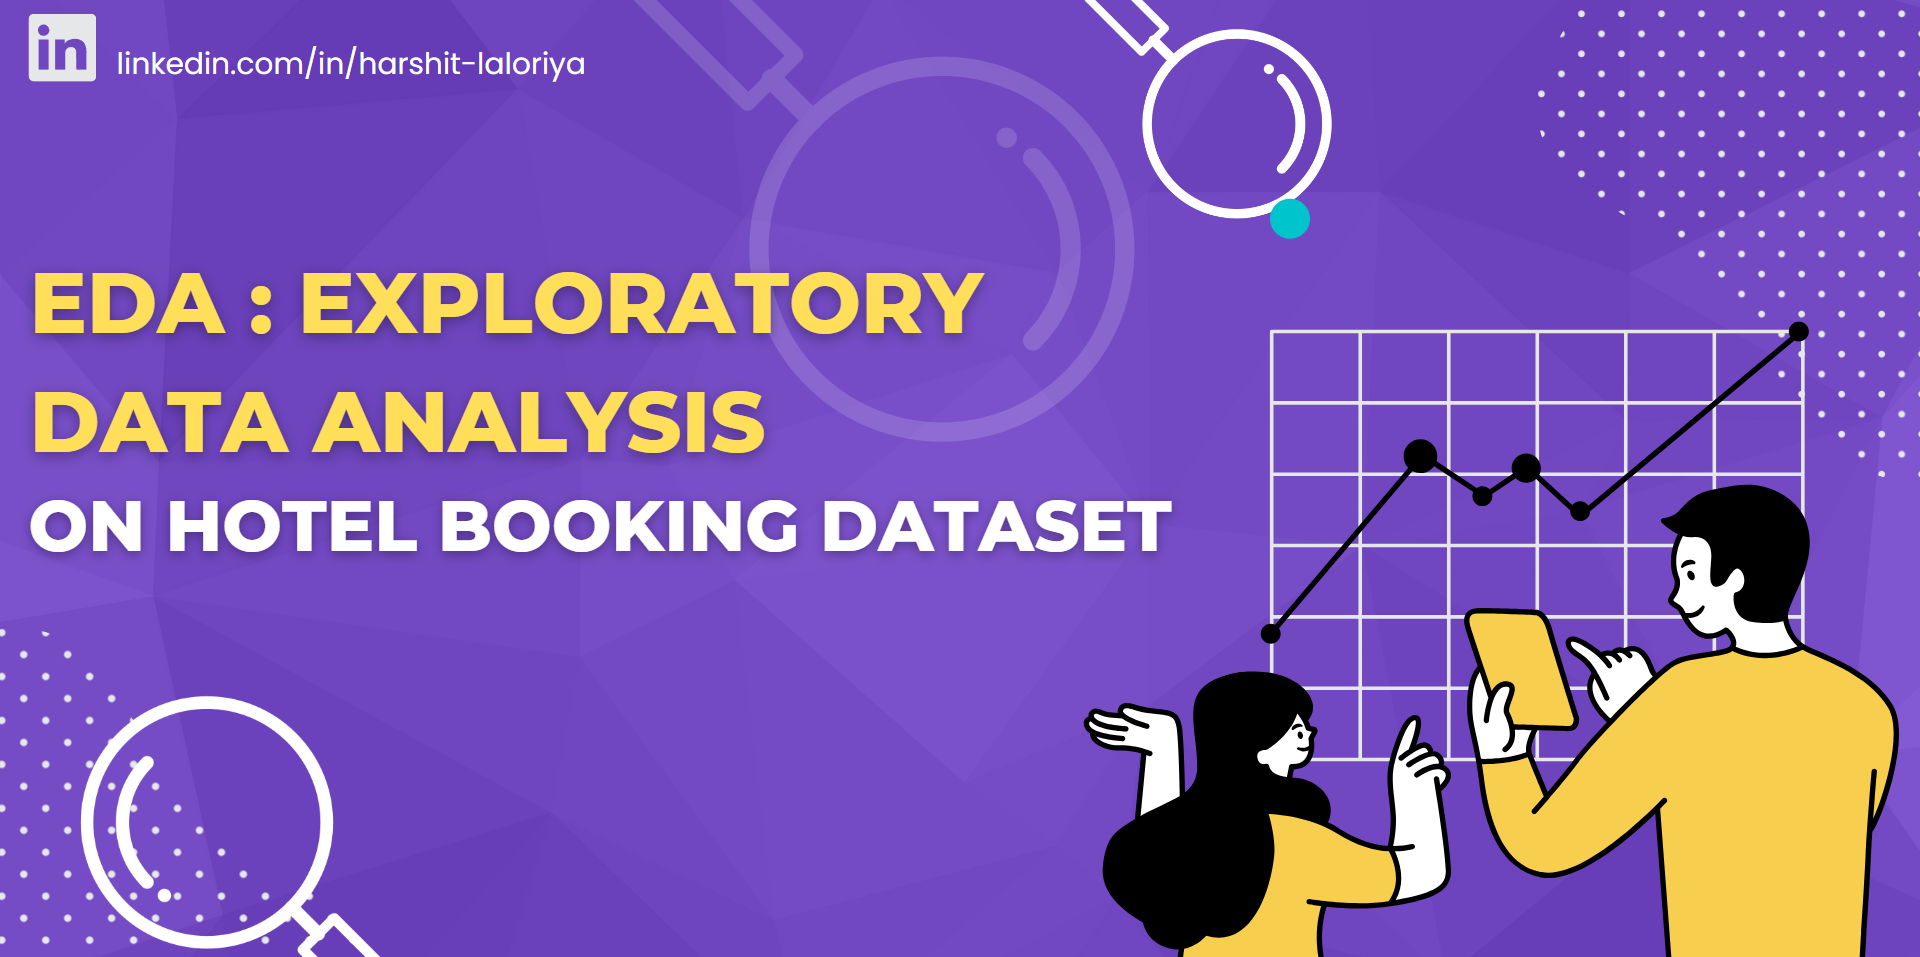

# Business Context of the dataset we will work on ?
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.



# Dataset Description
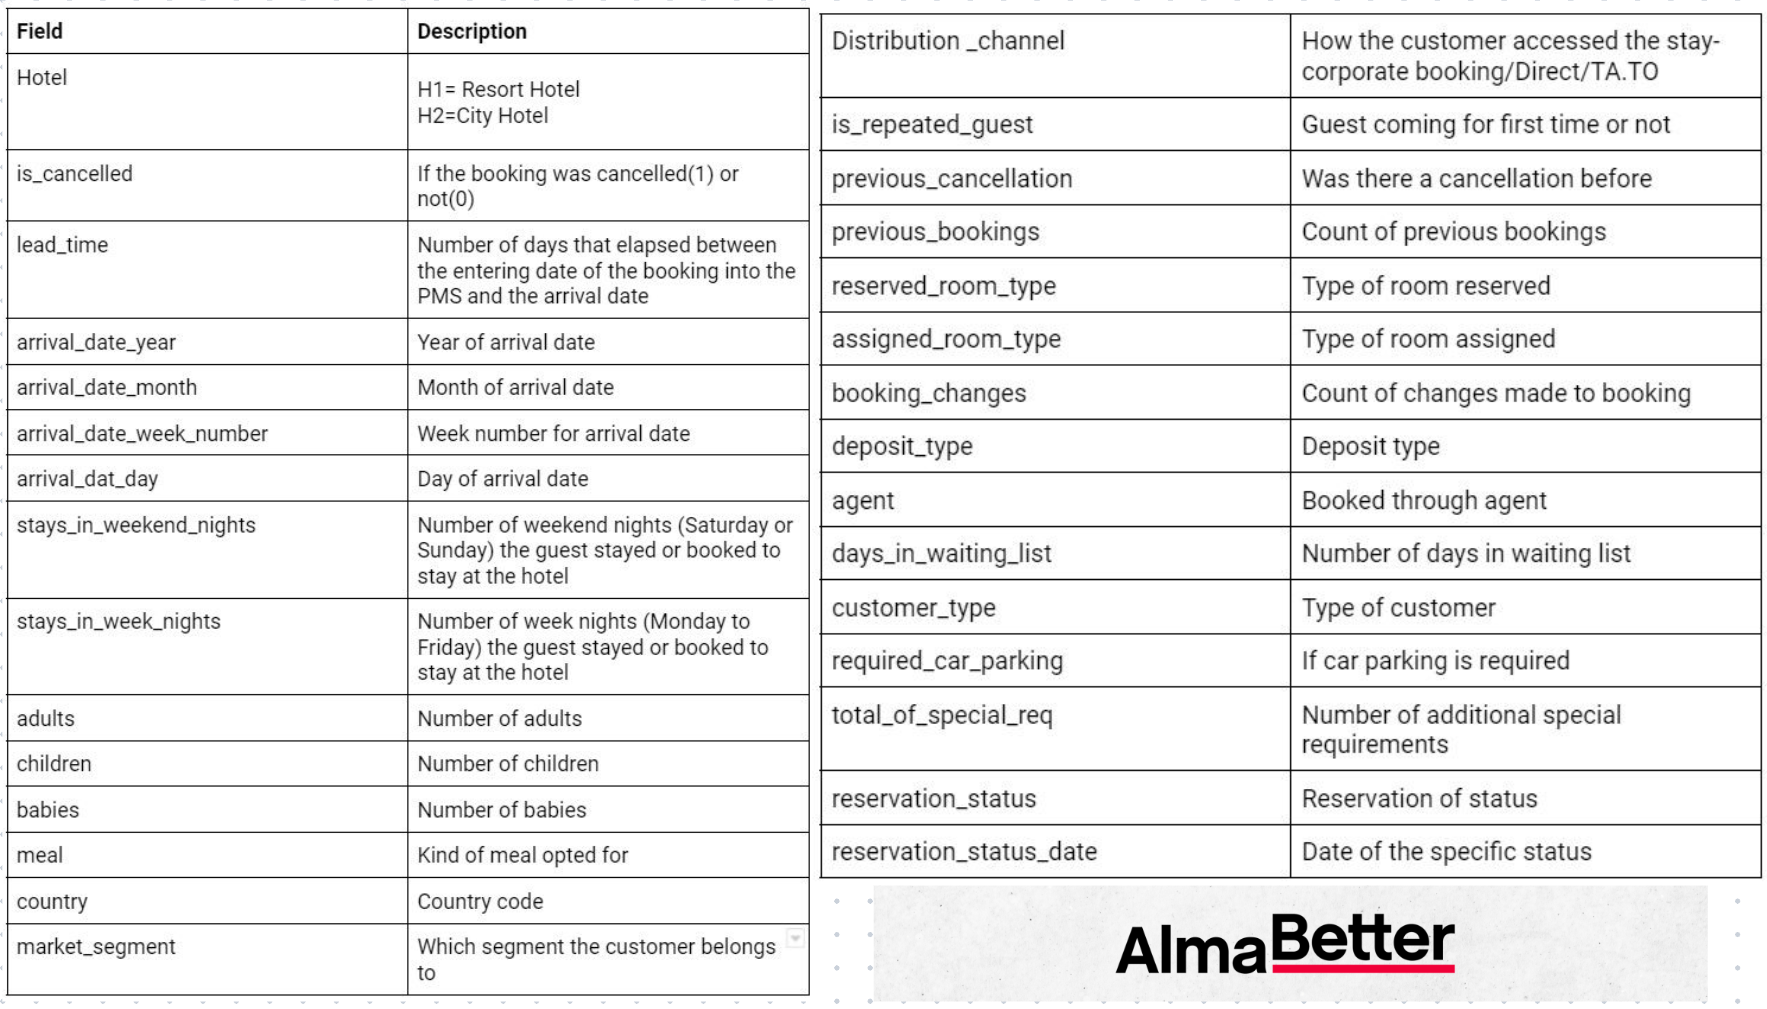

### Before jumping to this project we must have to know
# What is EDA?
-Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.(Source :- IBM)

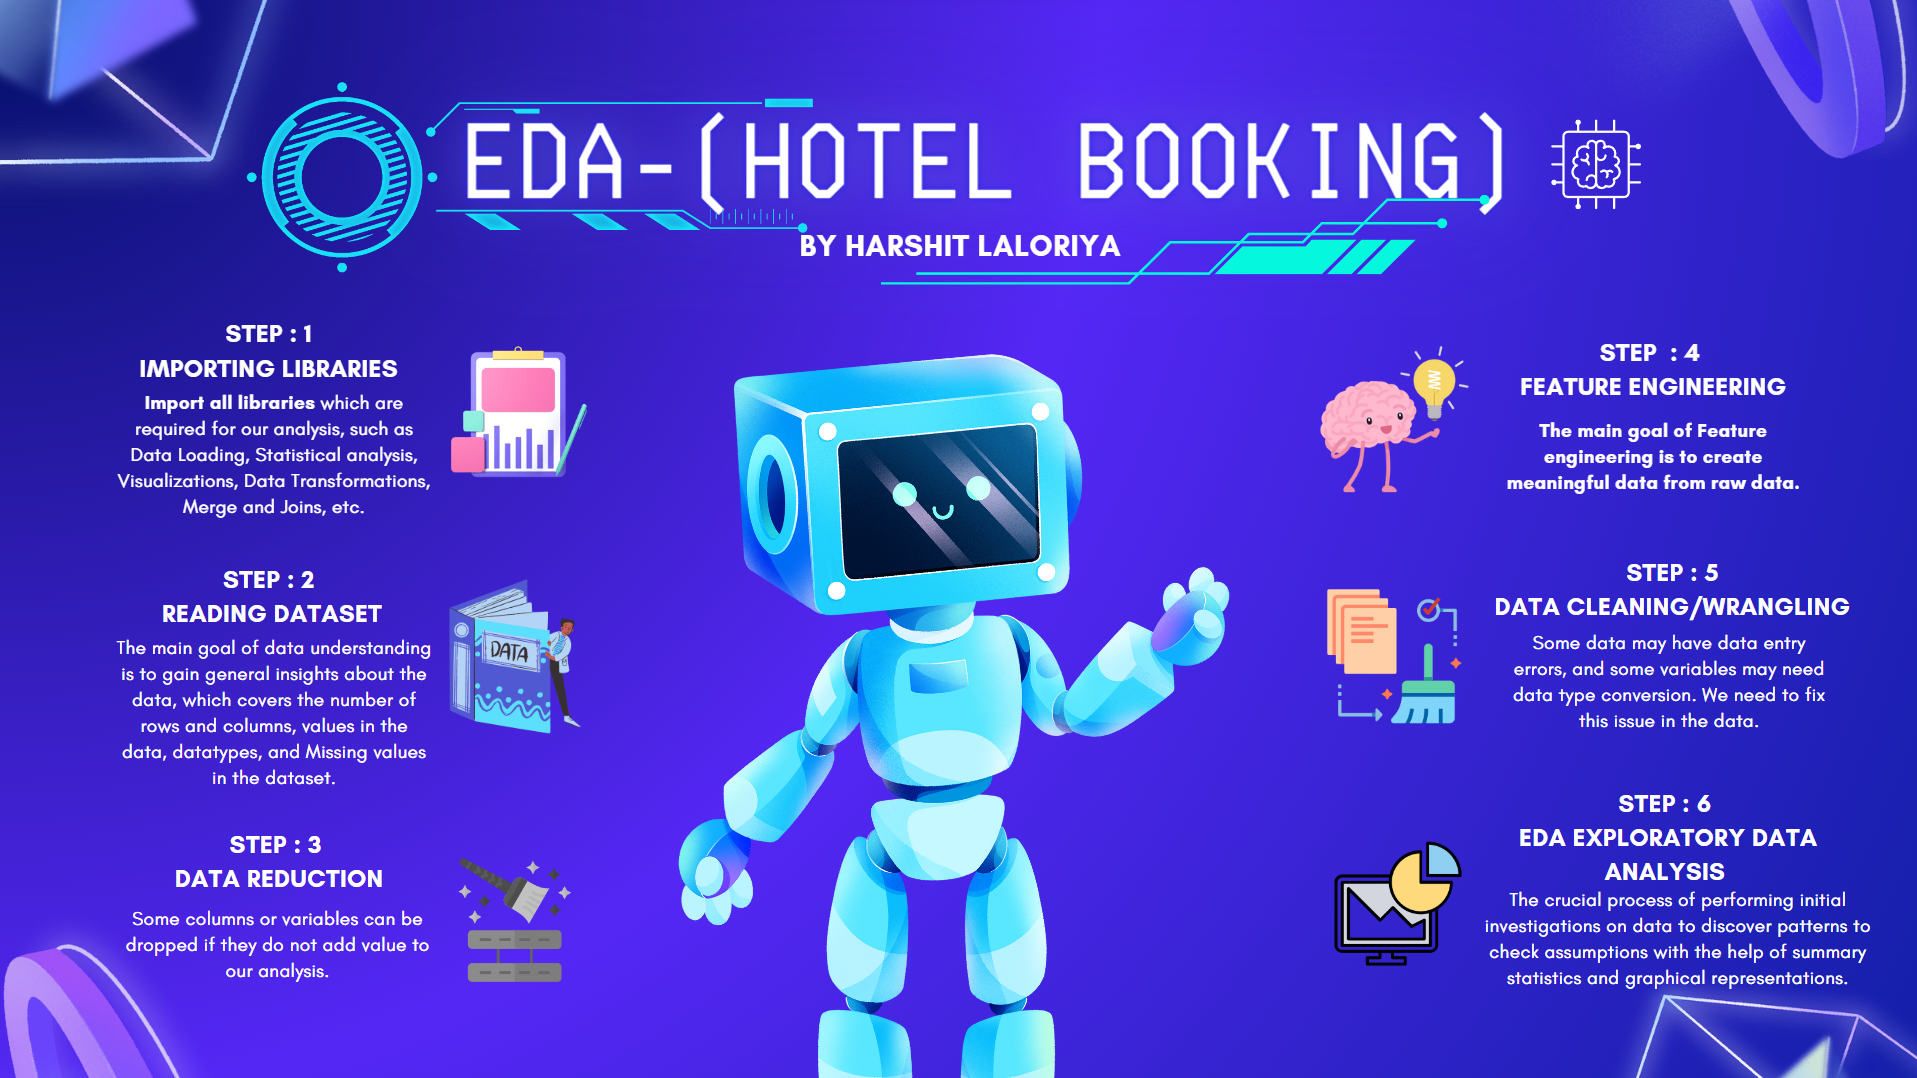

Lets dig in :)

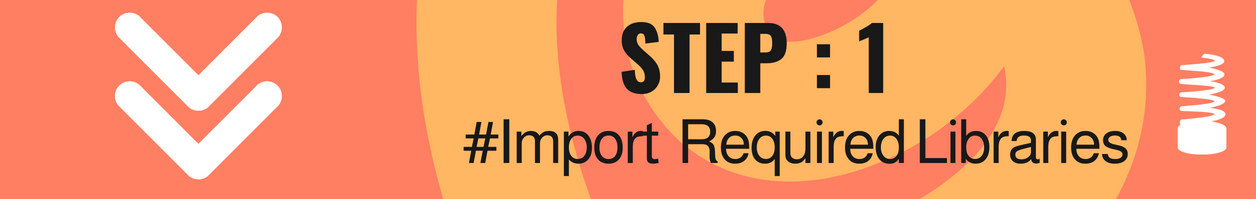

In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Here i am importing this module to ignore Warning.
import warnings
warnings.filterwarnings('ignore')

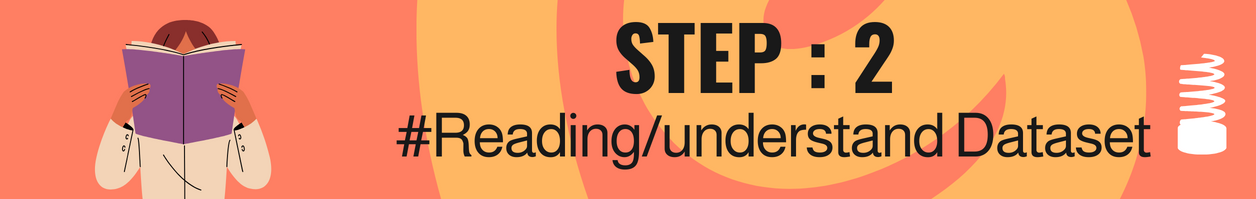

In [137]:
# sets the maximum number of columns to display in output
pd.set_option('display.max_columns', 32)

In [138]:
# reading file using pandas read_csv function
dataset_df = pd.read_csv(filepath_or_buffer="./hotel_bookings/hotel_bookings.csv")

In [139]:
# first five records of dataset
dataset_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [140]:
# last 5 records of dataset 
dataset_df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type     adr  \
119385  394.0      NaN                     0     Transient   96.14   
119386    9.0      NaN                     0     Transient  225.43   
119387    9.0      NaN                     0     Transient  157.71   
119388   89.0      NaN                     0     Transient  104.40   
119389    9.0      NaN                     0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  
119385          Check-Out              2017-09-06  
119386          Check-Out              2017-09-07  
119387          Check-Out              2017-09-07  
119388          Check-Out              2017-09-07  
119389          Check-Out              2017-09-07

In [141]:
# dimensions of dataset 
dataset_df.shape

(119390, 32)

In [142]:
# a bit information about each columns 
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [143]:
# some statistical information of numeric columns
dataset_df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [144]:
# number of unique records present in each column 
dataset_df.nunique(axis=0).sort_values()

hotel                                2
is_canceled                          2
is_repeated_guest                    2
arrival_date_year                    3
deposit_type                         3
reservation_status                   3
customer_type                        4
required_car_parking_spaces          5
meal                                 5
babies                               5
distribution_channel                 5
children                             5
total_of_special_requests            6
market_segment                       8
reserved_room_type                  10
arrival_date_month                  12
assigned_room_type                  12
adults                              14
previous_cancellations              15
stays_in_weekend_nights             17
booking_changes                     21
arrival_date_day_of_month           31
stays_in_week_nights                35
arrival_date_week_number            53
previous_bookings_not_canceled      73
days_in_waiting_list     

In [145]:
# number of null values present in each columns
dataset_df.isnull().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [146]:
# printing the count and percentage of null values present in columns.
Total_null_values_in_each_column = dataset_df.isnull().sum()
df = pd.DataFrame({'Null Values' : Total_null_values_in_each_column, 'in %' : round(Total_null_values_in_each_column*100/dataset_df.shape[0],3)})
df.loc[df['Null Values']>0]

Null Values    in %
children            4   0.003
country           488   0.409
agent           16340  13.686
company        112593  94.307

In [147]:
# looking up on datatypes of each columns
dataset_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [148]:
# count of different types of datatypes present in columns
dataset_df.dtypes.value_counts()

int64      16
object     12
float64     4
Name: count, dtype: int64

The BASIC THINGS I UNDERSTAND FROM THIS DATASET ARE:-
1. Shape of this dataset which is 119390 rows × 32 columns.
2. Number of Headers this dataset has is 32.
3. This dataset contains 119390 records.
3. This dataset has some missing/unwanted or null values which leads to some errors(during analysis).
4. The Headers with null values are :- [ 'children' , 'country', 'agent', 'company']
5. There is three type of Data present in this dataset.
        - 16 columns have int values.
        - 12 of them have strings or objects.
        - 4 contains float values.

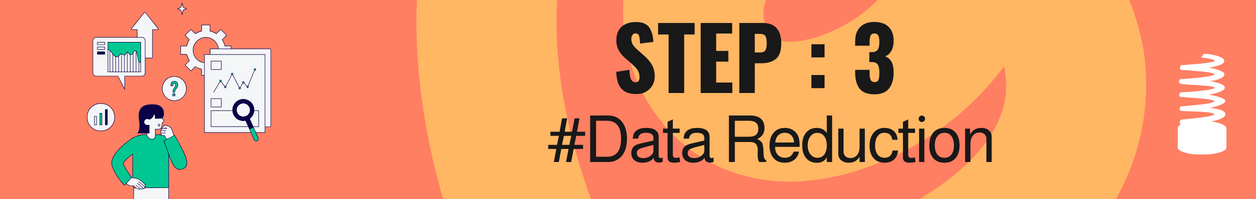

The 'company' column clearly has a significant percentage of null values—roughly 94%. 

As I can see the 'company' column contains so many null values as well as many unique value's. Therefore, it makes no sense for this wide range of data if i substitute these null values with any arbitrary value. So, its better to drop this column.

In [149]:
# droping column
dataset_df.drop(axis=0,columns='company', inplace= True)

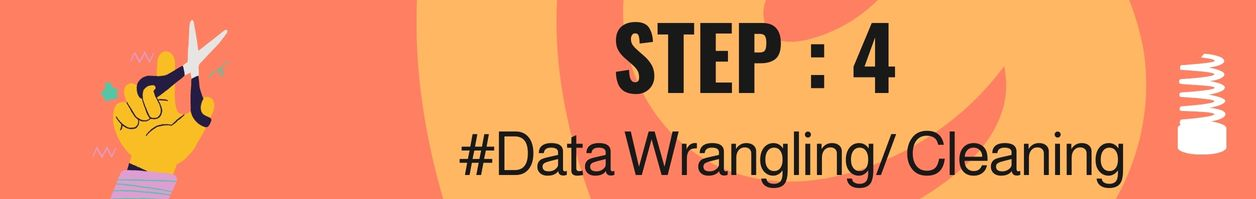

In [150]:
# Let's just simply find the total number of duplicate records this dataset contains and determine if they should be removed or handled.
duplicate_records = dataset_df.duplicated().sum()
f'The Dataset has {duplicate_records} duplicate records in total, making about {round(duplicate_records*100/dataset_df.shape[0])}% of this dataset'

'The Dataset has 32001 duplicate records in total, making about 27% of this dataset'

Logically, this high number of same/duplicate records in a hotel booking database is extremely unlikely.
As a result, I came to the conclusion that no these high number of records should contain the same or exact details. As a result, it is preferable to delete those duplicate records.


In [151]:
# droping duplicates
dataset_df.drop_duplicates(inplace = True)

The 'country' and 'agent' columns have less null values than the 'company' column; the 'country' column has just 0.409% of empty values, the 'agent' column has almost 14%, and the 'children' column has 0.003% of null values.

In [152]:
# unique values of 'children' column
dataset_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [153]:
# droping null values from 'children'column
dataset_df.dropna(subset=['children'], axis= 0, inplace=True)

In [154]:
# unique values of 'country' column
dataset_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [155]:
# droping null values from country column
dataset_df.dropna(subset='country', axis= 0,  inplace=True)

Now I'm dealing with the 'agent' column. So, as I can see above, the description of the 'agent' column in the data description field is 'booked through agent,' which means the booking agent of the family/person is given by the agent column.

Thus, the 'agent' column contains around 14% null entries. Since i can assume that agent number 0 has a room reserved for the specific family or individual, we may replace all of the null with 0.

Actually, the 0 indicates that guests book hotel rooms for themselves rather than through AGENTS.

In [156]:
# unique values of 'agent' column
dataset_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301.,
       193., 182., 135., 350., 195., 352., 355., 159., 139., 363., 384.,
       360., 331., 367.,  64.,  78., 406., 163., 41

In [157]:
# replacing null values to 0 of agent column
dataset_df['agent'].fillna(value= 0, inplace = True)

In [158]:
# converting the datatype of columns to required datatype
dataset_df = dataset_df.astype({'children' : 'int64', 'agent' : 'int64'})

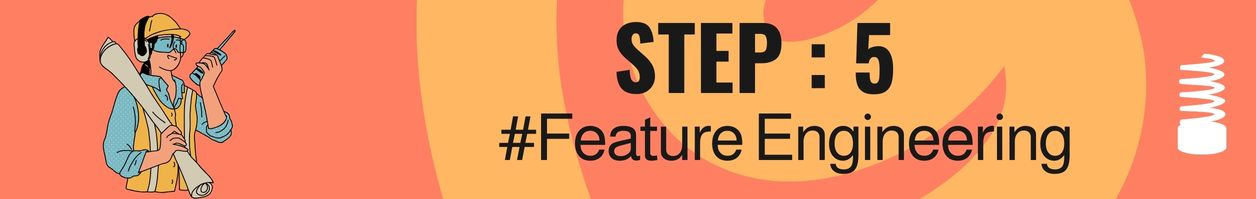

Here I am creating a new column name "Total_number_of_guests" this column store the sum of "adults", "children", and "babies".

In [159]:
# creating new column for better analysis
dataset_df['Total_number_of_guests'] = dataset_df[["babies", 'adults', 'children']].sum(axis=1)

Now I am creating a new column called "Total_nights_stay" by combining(sum) the values of "stays_in_weekend_nights" and "stays_in_weeknights.

In [160]:
# creating new column for better analysis
dataset_df['Total_nights_stay'] = dataset_df[['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1)

There is one more column i am creating "adr_per_person" which represent the average daily rate per person.

In [161]:
# creating new column for better analysis
dataset_df['adr_per_person'] = round(dataset_df['adr']/dataset_df[['children', 'adults']].sum(axis=1),2)

Is it possible for total_number_of_guests to be zero ?

In [162]:
# filtering records through condition based on "Total number of guests"
filt1 =(dataset_df['Total_number_of_guests'] ==0)
filt1.sum(axis = 0)

161

In [163]:
# Droping these unwanted records.
dataset_df.drop(index= dataset_df.loc[filt1].index ,inplace= True)

Is it possible for total_nights_stay to be 0 or less then 0 ?

In [164]:
# checking records
(dataset_df['Total_nights_stay']<0).sum()

0

is it possible for adr_per_person to be 0 or less then 0 ?

In [165]:
# filtering records
filt2 = (dataset_df['adr_per_person']<=0)
filt2.sum()

1633

In [166]:
# droping these unwanted records. 
dataset_df.drop(index= dataset_df.loc[filt2].index , inplace= True)

All set now we can perform eda on this DataFrame.

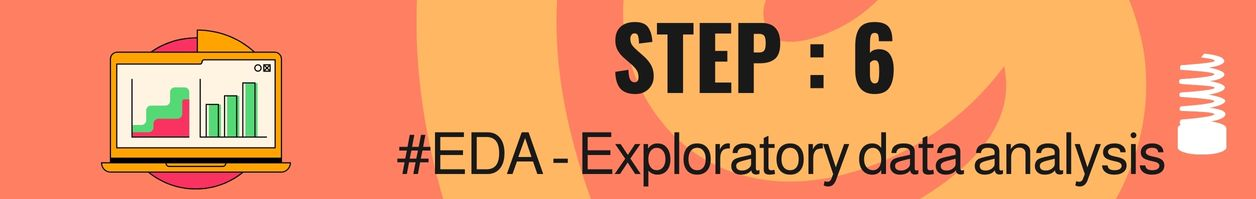

In [167]:
# Determine the Continuous and Categorical data columns
categorical_data = dataset_df.select_dtypes(include=['object']).columns
continuous_data = dataset_df.select_dtypes(include=['int64']).columns
{"categorical": len(categorical_data), "continuous" : len(continuous_data)}

{'categorical': 12, 'continuous': 20}

In [168]:
# setting plot area 
plt.rcParams["figure.figsize"] = [18, 8]

lets check for the correlations between numeric variables using seaborn heatmap

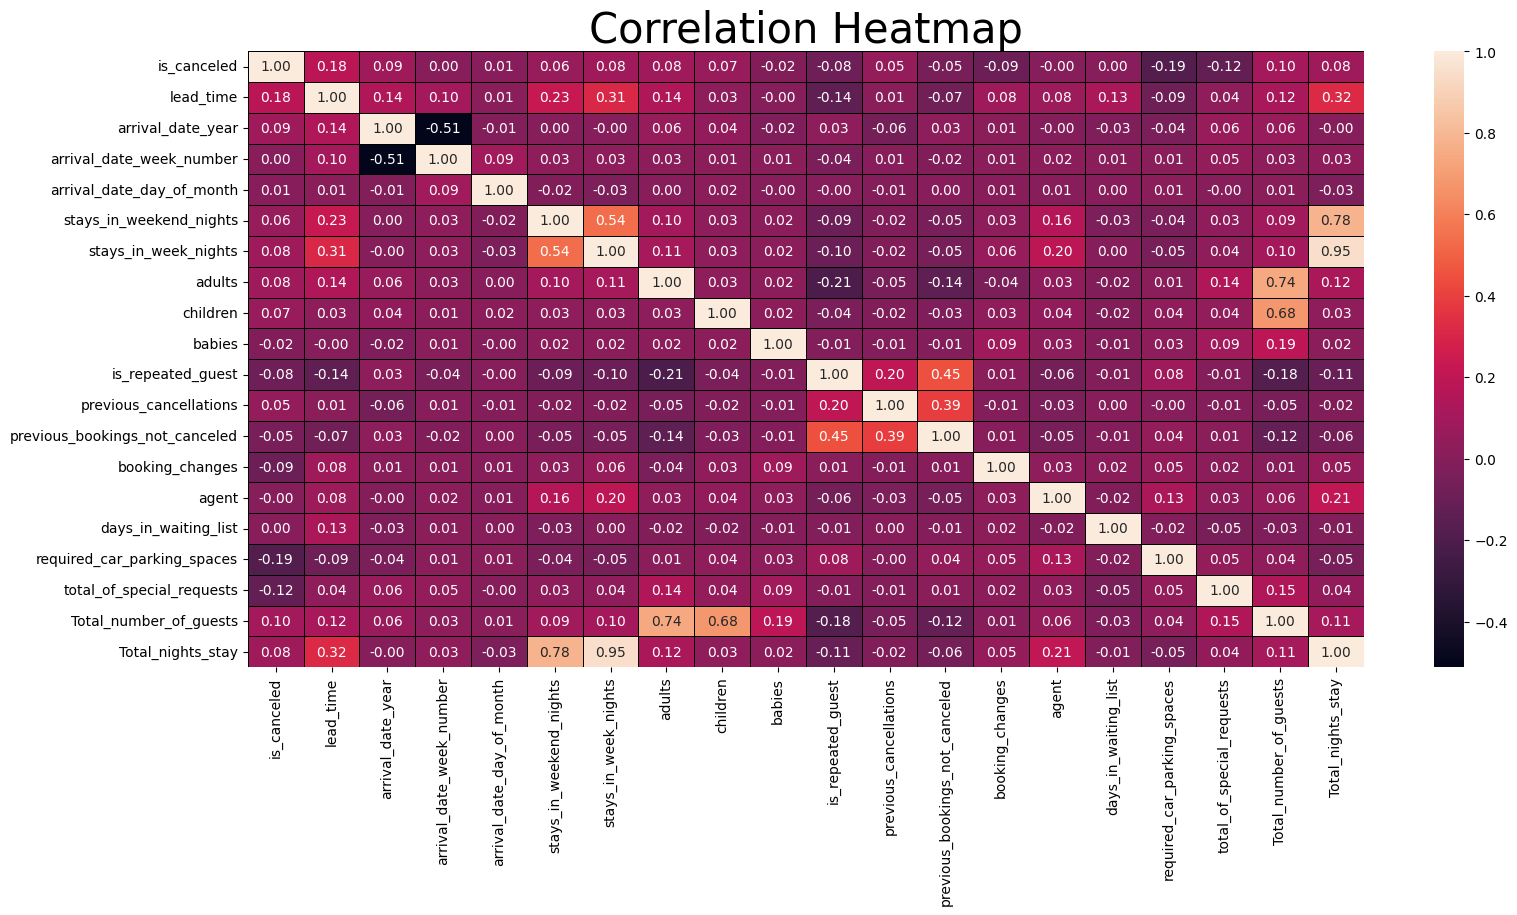

In [169]:
# correlation matrix
corr_matrix = dataset_df[continuous_data].corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontdict={'fontsize' : 30})
plt.show()

<BarContainer object of 10 artists>

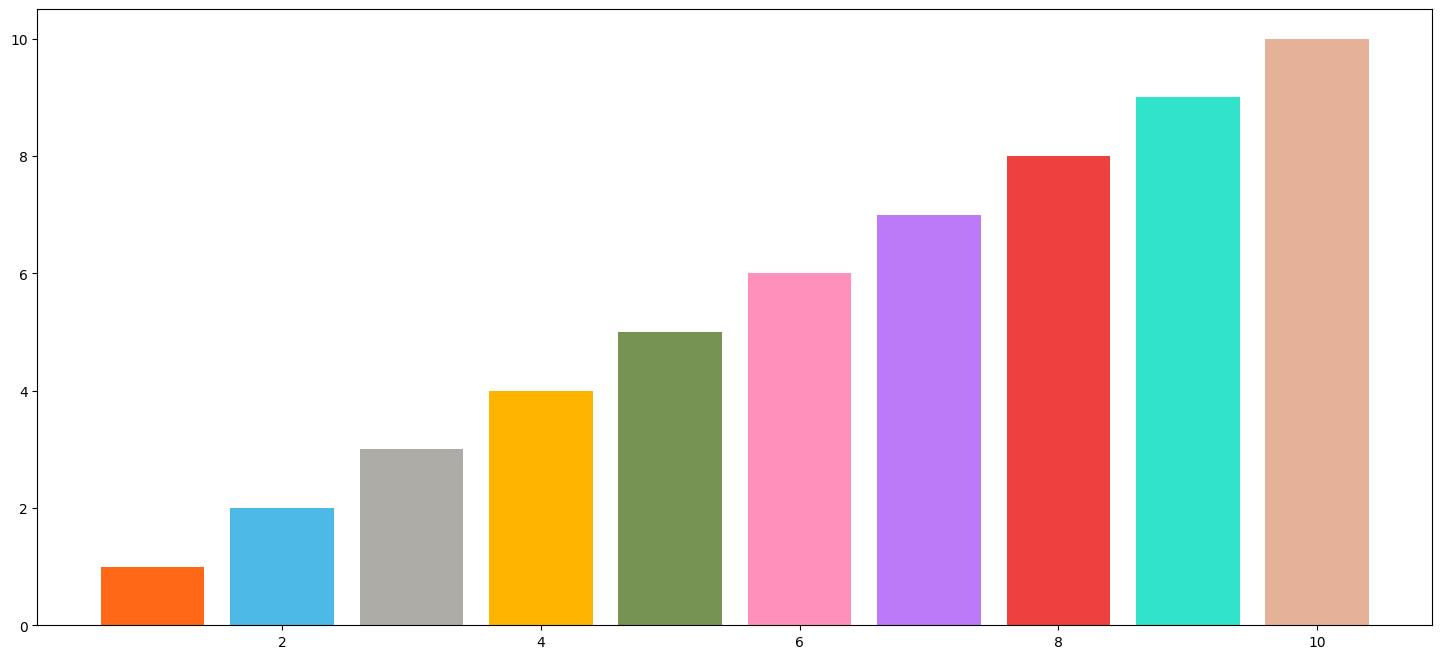

In [170]:
# i have created custom palette for me and i will use this palette throughout this eda step.
palette = ["#FE6816","#4CB9E7","#ADACA7","#FFB400","#769353",'#FF90BC',"#BC7AF9","#EF4040","#30E3CA", "#E5B299"]
plt.bar([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], color = palette)

In [171]:
# grouping
group = dataset_df.groupby(by='hotel')
city = group.groups.get('City Hotel')
resort = group.groups.get('Resort Hotel')

# confirmed booking 
confirmed_guests = dataset_df.loc[dataset_df['is_canceled']==0]

In [172]:
#  My  function to draw custom graphs
def my_plot(column : str, hotel = 'Overall' , subplot = 1, percentage = True, graph = 'countplot', title = 'Overall', top_x = 10, show_count = False, bar_xticks = None ,pie_labels=None, auto_pct = "%.2f%%"):
    # condition for hotel parameter
    if type(hotel) != str:
        plt.subplot(1,2,subplot)
        df = dataset_df.loc[hotel]
        font = 10
    else:
        df = dataset_df
        font = 18

    # filtering
    series = df[column].value_counts()[:top_x]

    # function for countplot
    if graph in ('countplot', 'countplot%'):
        percentage_list = [round(i*100/sum(series.values),2) for i in series]

        # condition for graph parameter
        if graph == 'countplot':
            val = series.values
        elif graph == 'countplot%':
            val = percentage_list

        # Graph Creation
        plt.bar(series.index.astype('str'), val, color = palette, zorder=3)
        
        # condition for percentage perameter
        if percentage:
            for i, value in enumerate(percentage_list):
                plt.text(i, value, f"{value}%", ha='center', fontsize = font)

        # condition for show_count parameter
        if show_count:
            for i, value in enumerate(series.values):
                plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
        plt.ylabel("")

        # custom xticks for bar graph
        if bar_xticks != None:
            plt.xticks(series.index.astype('str') ,bar_xticks)

        plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
    

    # function for pie chart
    if graph == 'pie':
        if pie_labels == None:
            pie_labels = list(series.index)
        plt.pie(series,  autopct=auto_pct, textprops={'fontsize':20}, explode = [0.1 for i in range(len(series))] , labels=pie_labels, colors = palette[::2])

    # title of graph
    plt.title(title, fontsize = '24')


## <b> Q1.</b> What are the Total Number of bookings and Cancellations?

### A. In terms of numbers

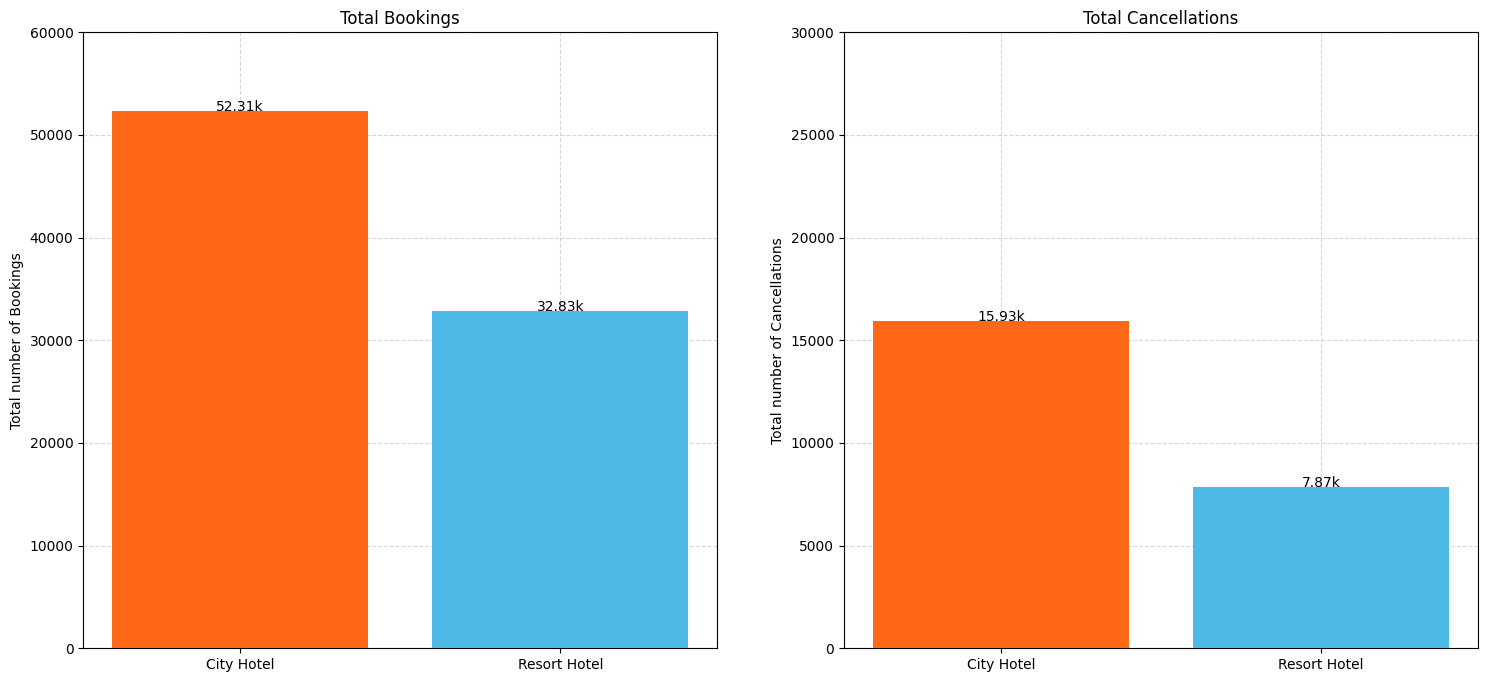

In [173]:
# defining series and functions for bar graph
series1 = dataset_df['hotel'].value_counts().rename("Total Bookings")
series2 = pd.Series({i : dataset_df.loc[dataset_df['hotel'] == i,'is_canceled'].sum() for i in sorted(dataset_df['hotel'].unique())}, name= "Total Cancellations")
df1 = pd.concat([series1, series2], axis=1)
def my_bar(series : pd.Series, subplot : int):
    plt.subplot(1,2,subplot)
    plt.bar(series.index, series.values, color = palette ,zorder= 3)
    for i, value in enumerate(series.values):
        plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
    plt.ylim((0,round((series.max()/10000)+1)*10000))
    plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
    plt.title(series.name)
    plt.ylabel(' number of '.join(series.name.split()))
    
my_bar(series = series1, subplot=1)
my_bar(series= series2,subplot=2)
plt.show()

### B. Hotel wise booking vs cancellations

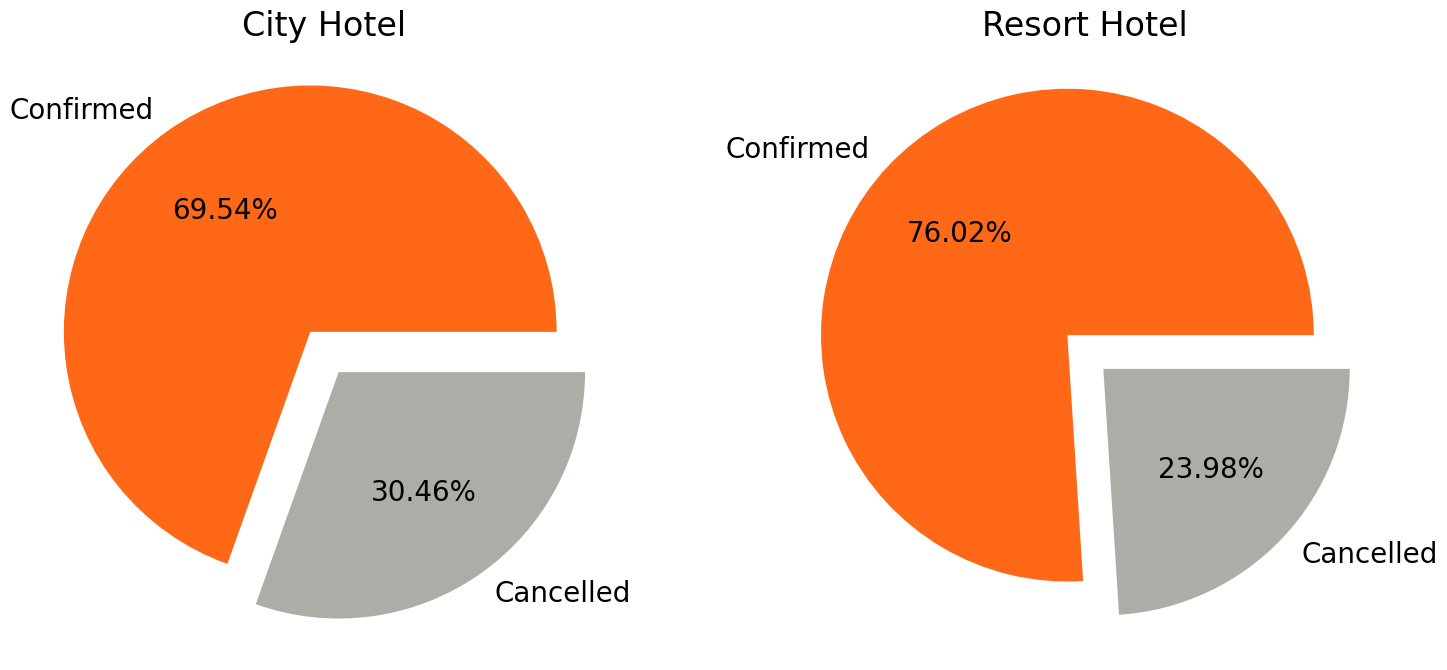

In [174]:
my_plot(hotel= city, column='is_canceled',graph='pie', title='City Hotel', pie_labels=['Confirmed', 'Cancelled'] )
my_plot(hotel= resort, column='is_canceled',graph='pie', title='Resort Hotel', pie_labels=['Confirmed', 'Cancelled'] , subplot= 2)

## <b> Q2.</b> Which agent gets the most bookings?


### A. Hotel wise

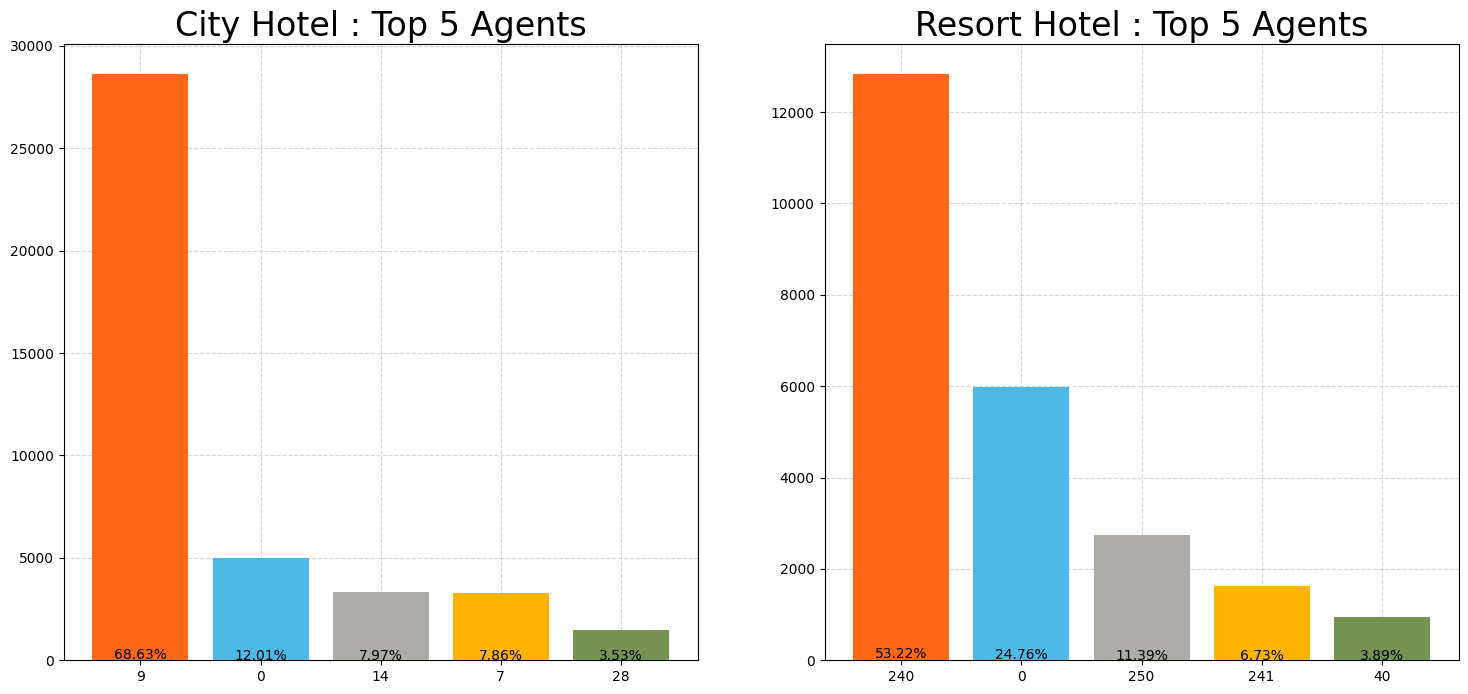

In [175]:
my_plot(column='agent', hotel=city, top_x= 5, title="City Hotel : Top 5 Agents")
my_plot(column='agent', hotel=resort, top_x= 5, title="Resort Hotel : Top 5 Agents", subplot=2)

### B. Overall

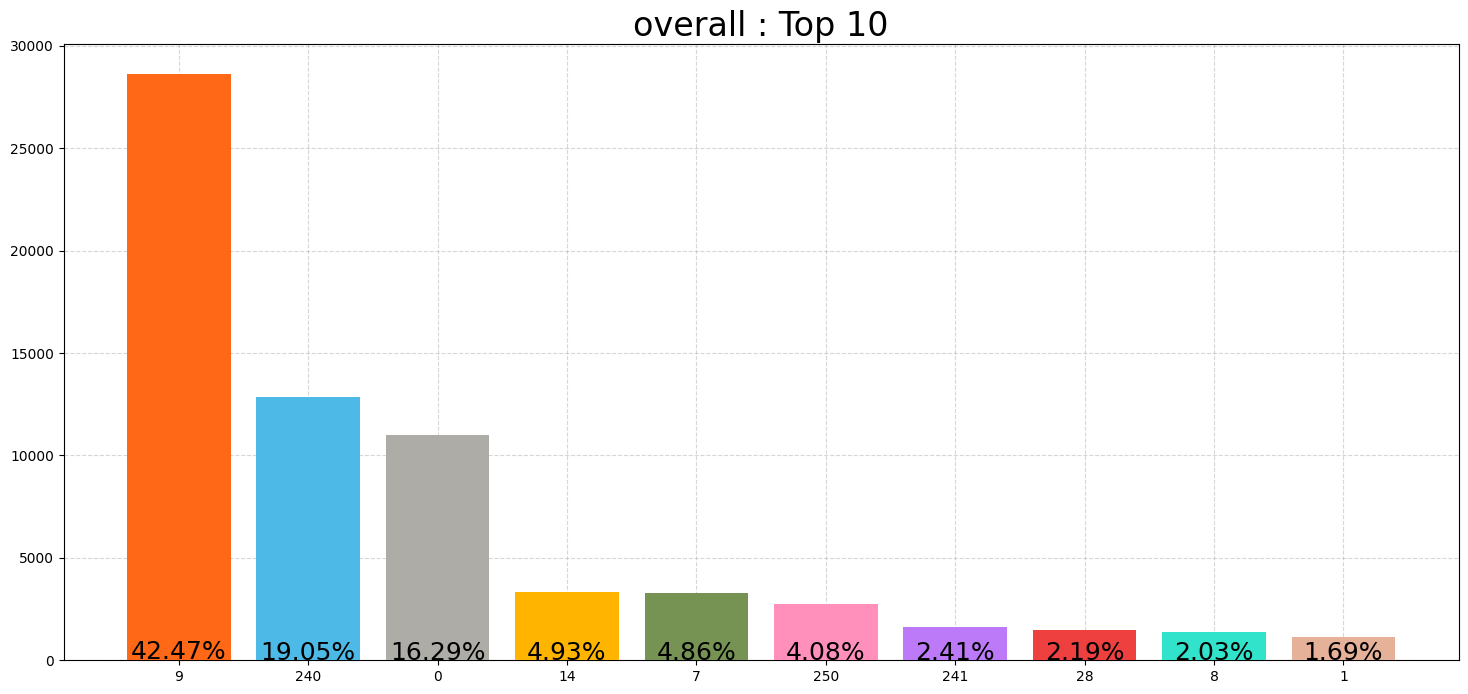

In [176]:
my_plot(column='agent', title= 'overall : Top 10')

## <b> Q3.</b> Which channel distribution is more often use by customers?

### A. Hotel wise

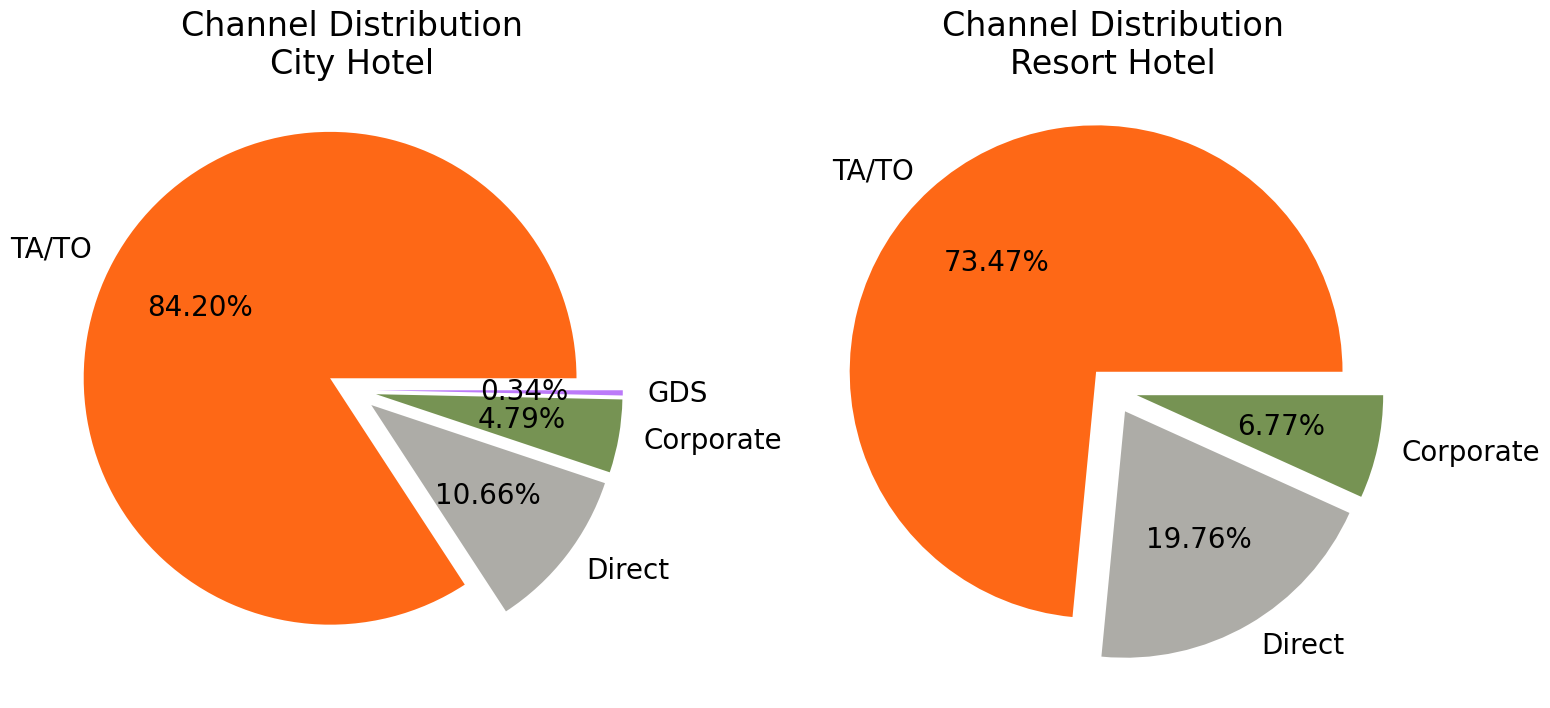

In [177]:
my_plot(column='distribution_channel', hotel=city, graph='pie', title='Channel Distribution\nCity Hotel')
my_plot(column='distribution_channel', hotel=resort, graph='pie', title= 'Channel Distribution\nResort Hotel',top_x=3, subplot=2)

### B. Overall

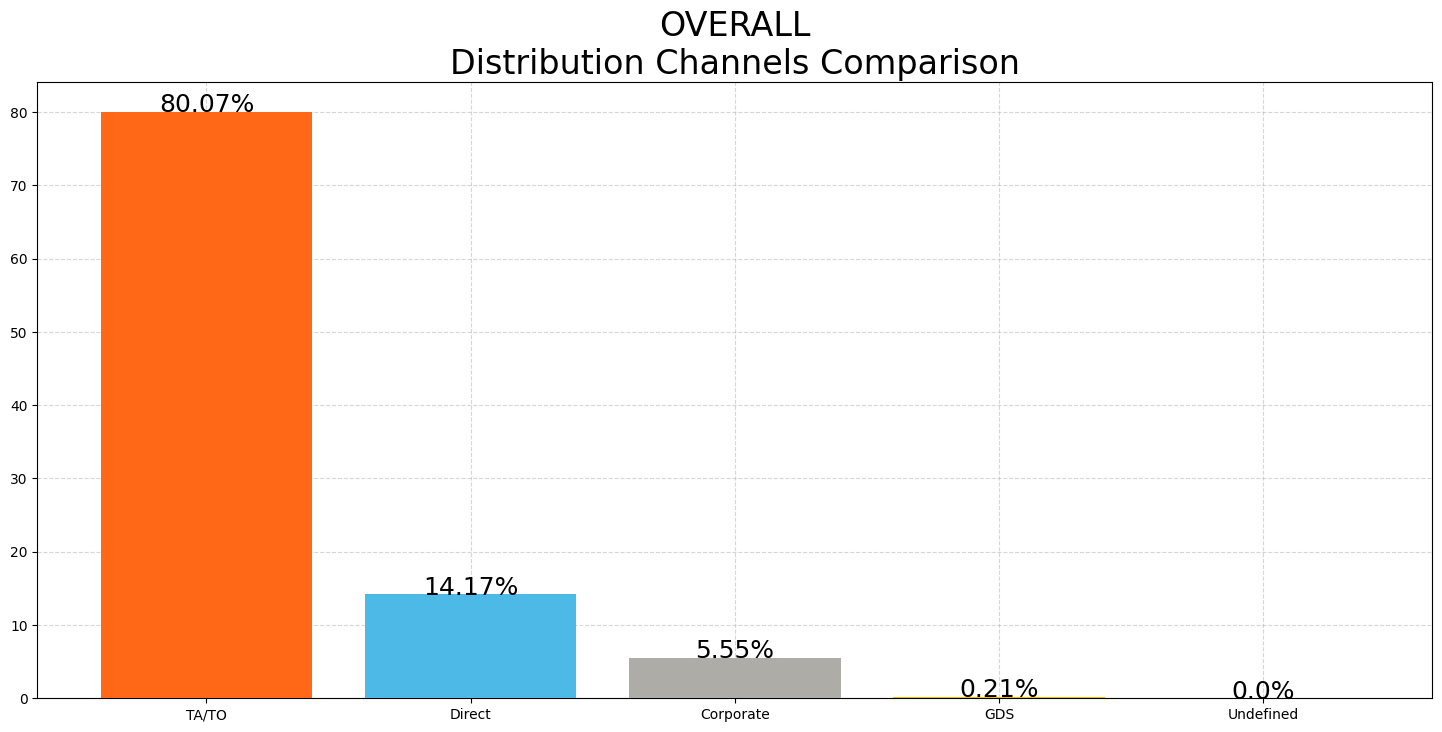

In [178]:
my_plot(column='distribution_channel', graph='countplot%', title="OVERALL\nDistribution Channels Comparison")

## <b> Q4.</b> Which Meal is the most favourite \\ Opted meal by a customers?

### A. Hotel wise

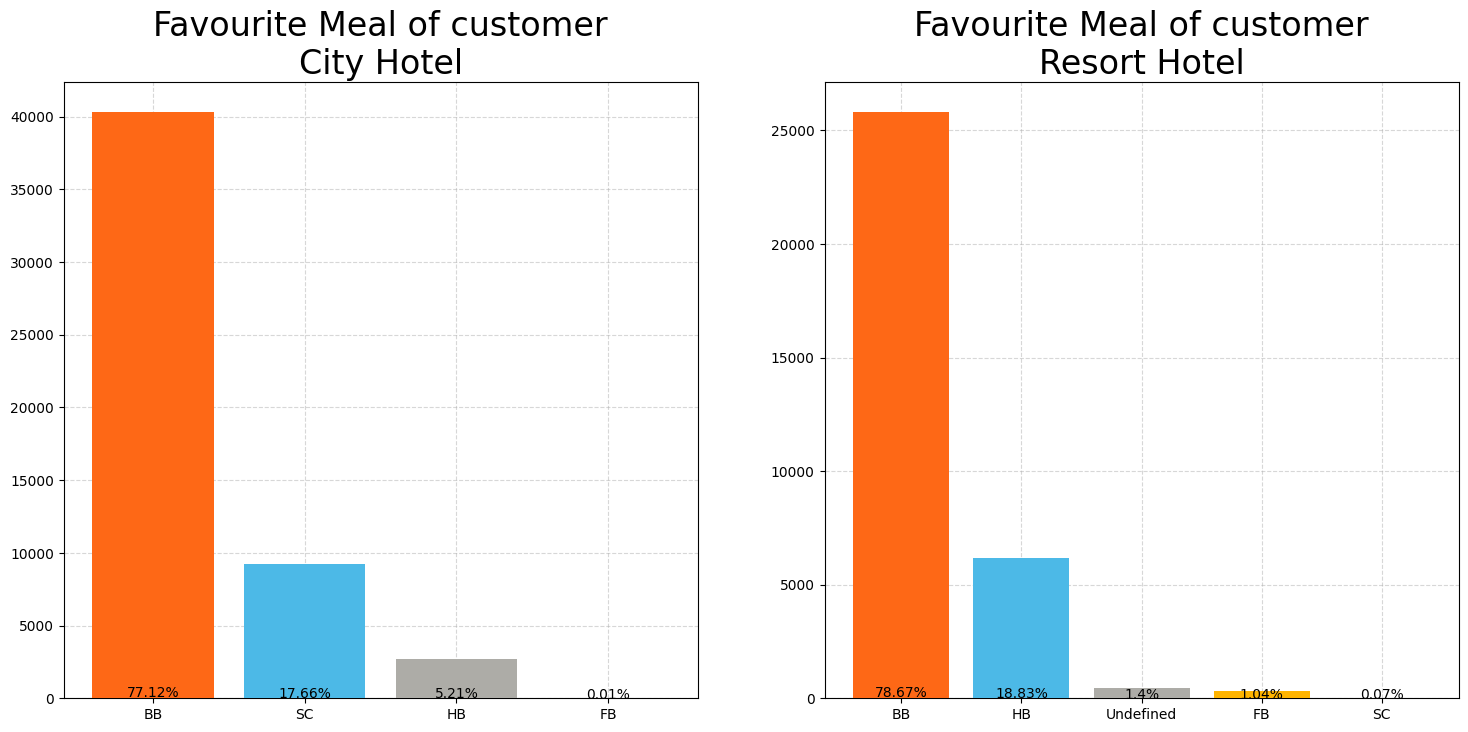

In [179]:
string = 'Favourite Meal of customer'
my_plot(column='meal',hotel = city, title = f"{string}\nCity Hotel", subplot= 1)
my_plot(column='meal',hotel = resort, title = f"{string}\nResort Hotel", subplot= 2)

### B. Overall

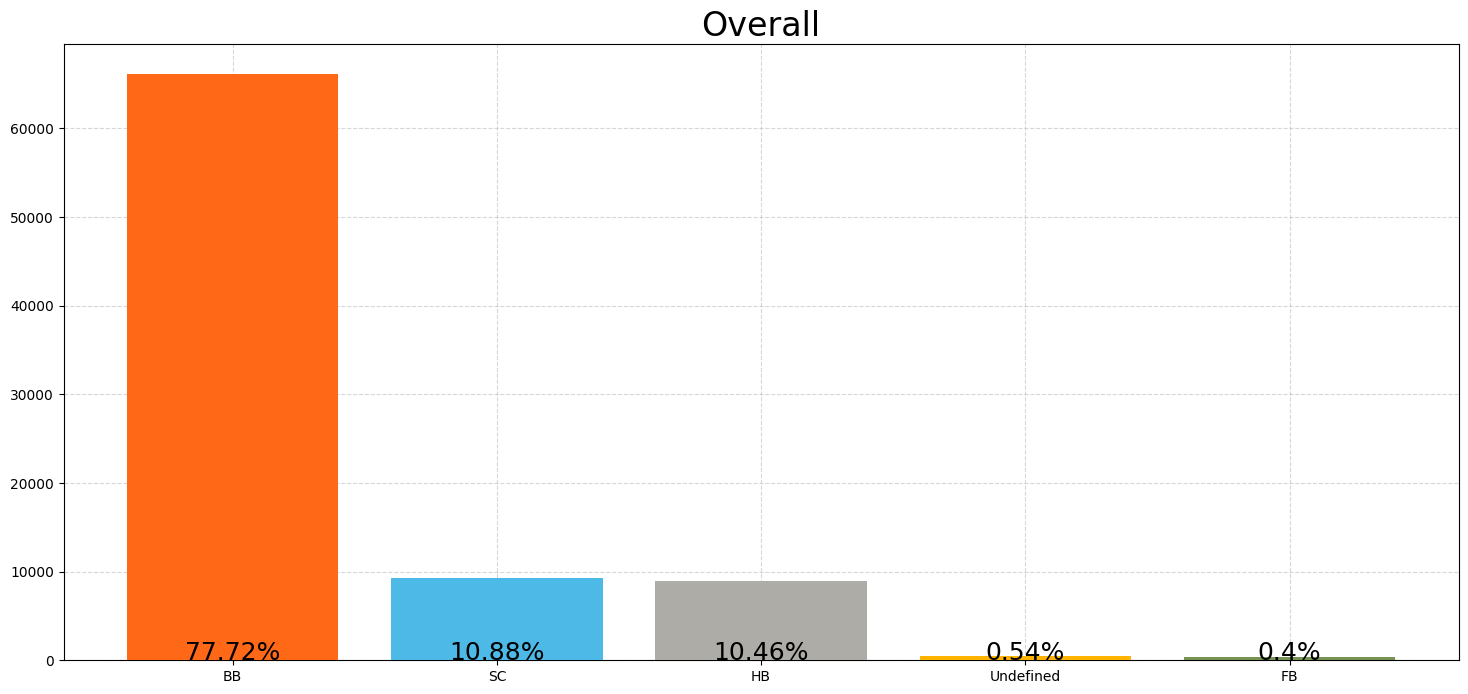

In [180]:
my_plot(column= 'meal')

## **Q5.** Which country makes the most reservations?

### A. Hotel wise

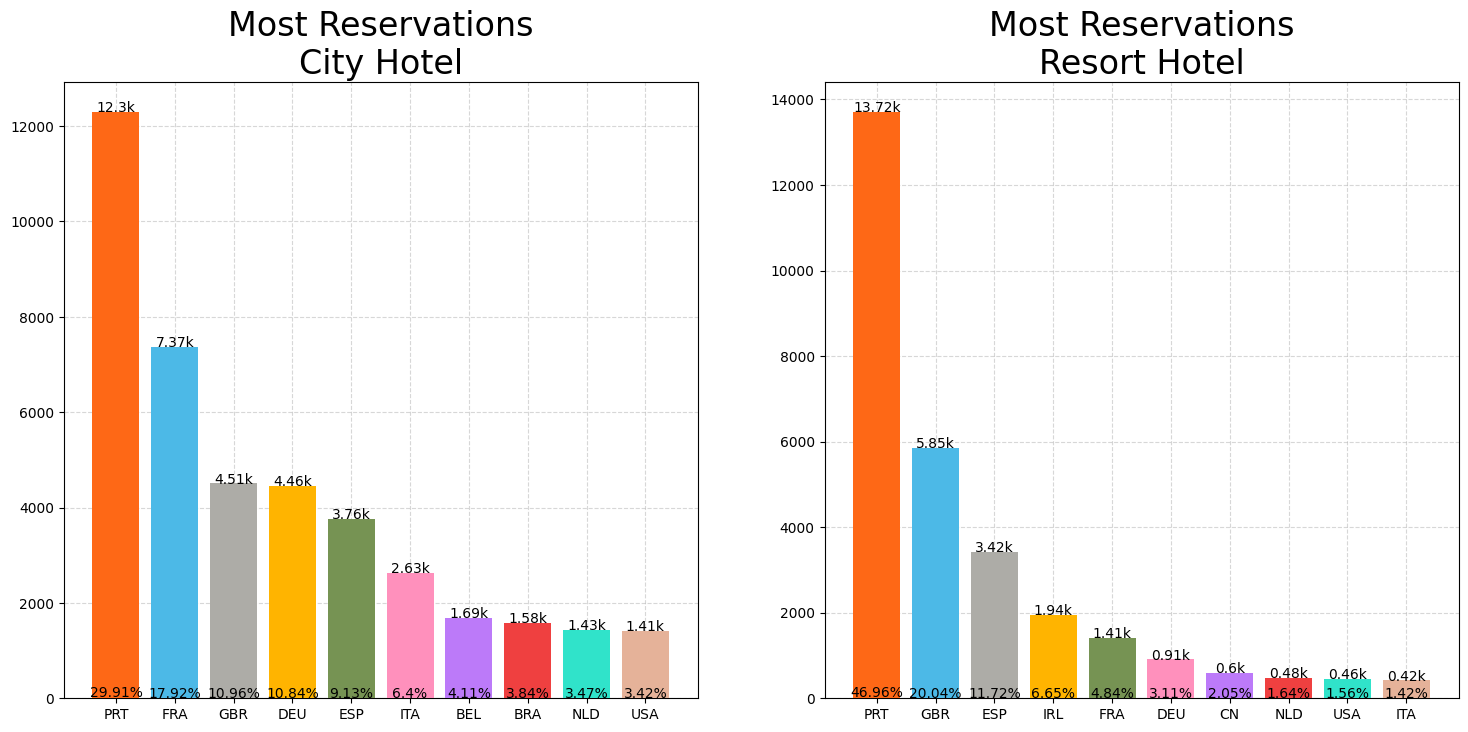

In [181]:
string = "Most Reservations"
my_plot(column='country', hotel=city, title=f"{string}\nCity Hotel", subplot=1, show_count = True)
my_plot(column='country', hotel=resort, title=f"{string}\nResort Hotel", subplot=2, show_count = True)

### B. Overall

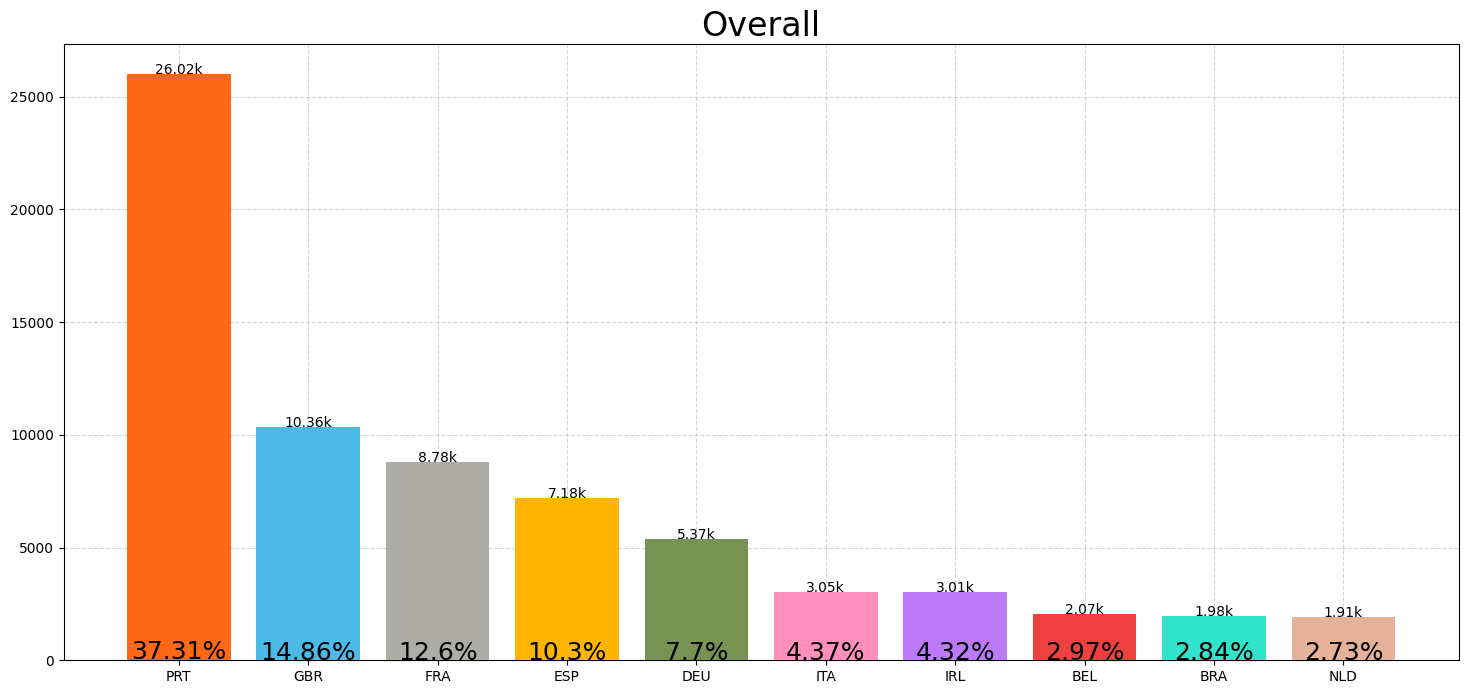

In [182]:
my_plot(column='country', show_count = True)

## **Q6.** In which year more reservations are made?

### A. Hotel wise

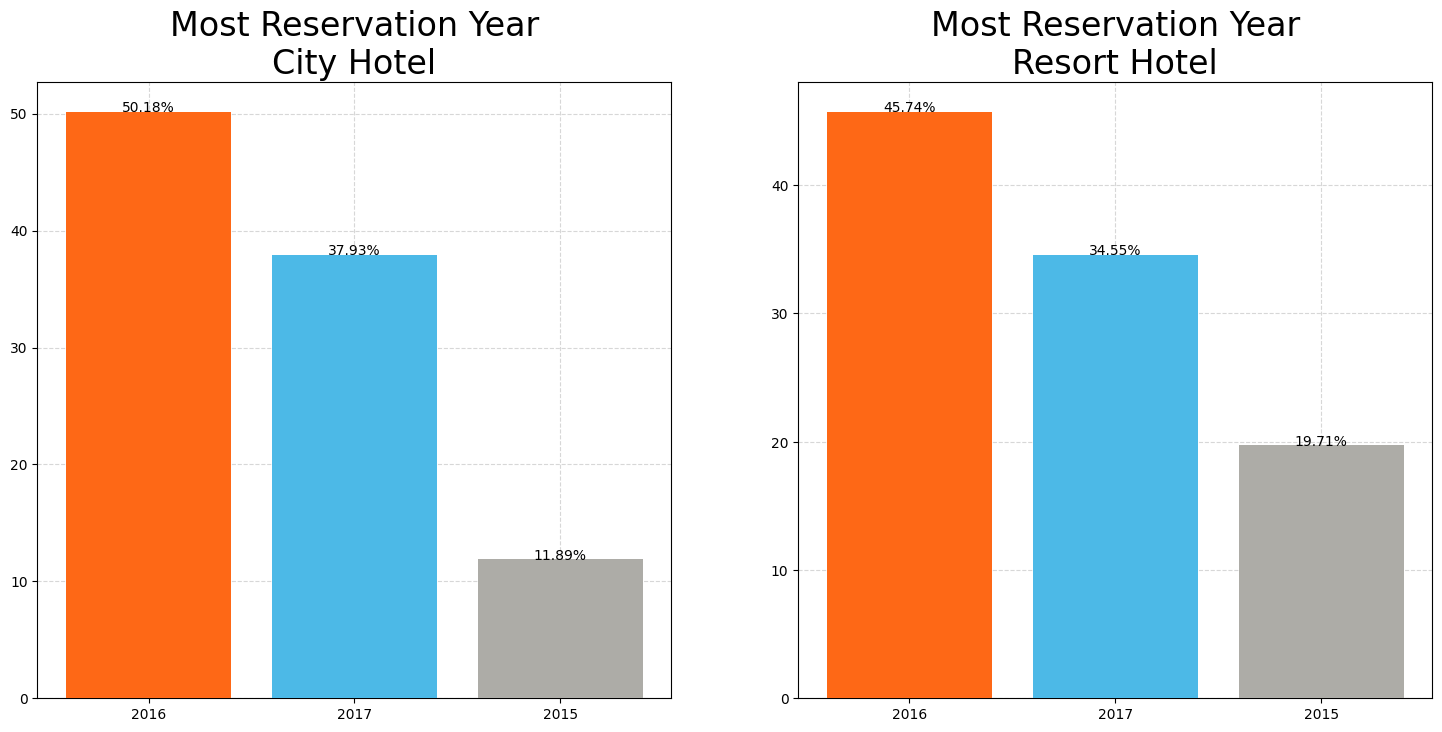

In [183]:
my_plot(column = 'arrival_date_year', hotel = city, subplot= 1, graph='countplot%', title = 'Most Reservation Year\nCity Hotel')
my_plot(column = 'arrival_date_year', hotel = resort, subplot= 2, graph='countplot%', title = 'Most Reservation Year\nResort Hotel')

### B. Overall

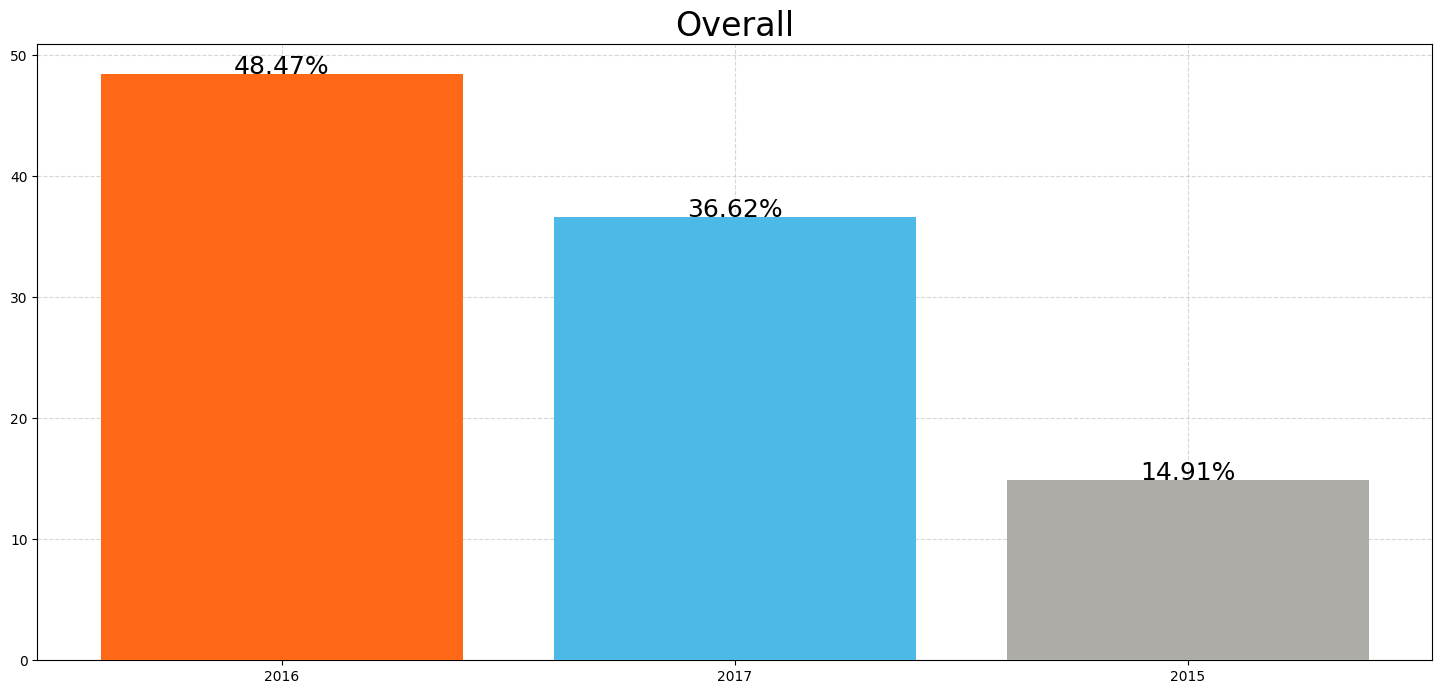

In [184]:
my_plot(column = 'arrival_date_year', graph='countplot%')

## **Q7.** In which Month more reservations was made?

### A. Hotel wise

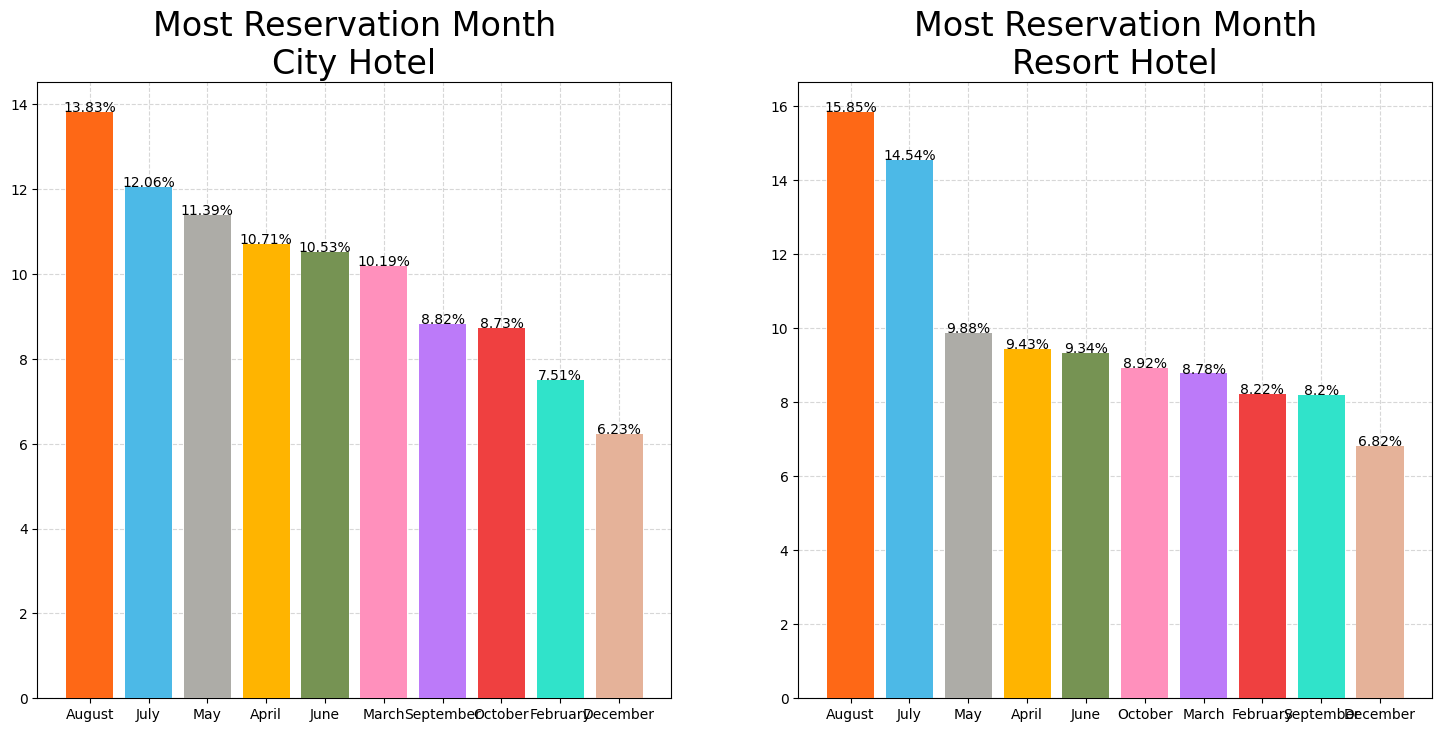

In [185]:
my_plot(column = 'arrival_date_month', hotel = city, subplot= 1, graph='countplot%', title = 'Most Reservation Month\nCity Hotel')
my_plot(column = 'arrival_date_month', hotel = resort, subplot= 2, graph='countplot%', title = 'Most Reservation Month\nResort Hotel')

### B. Overall

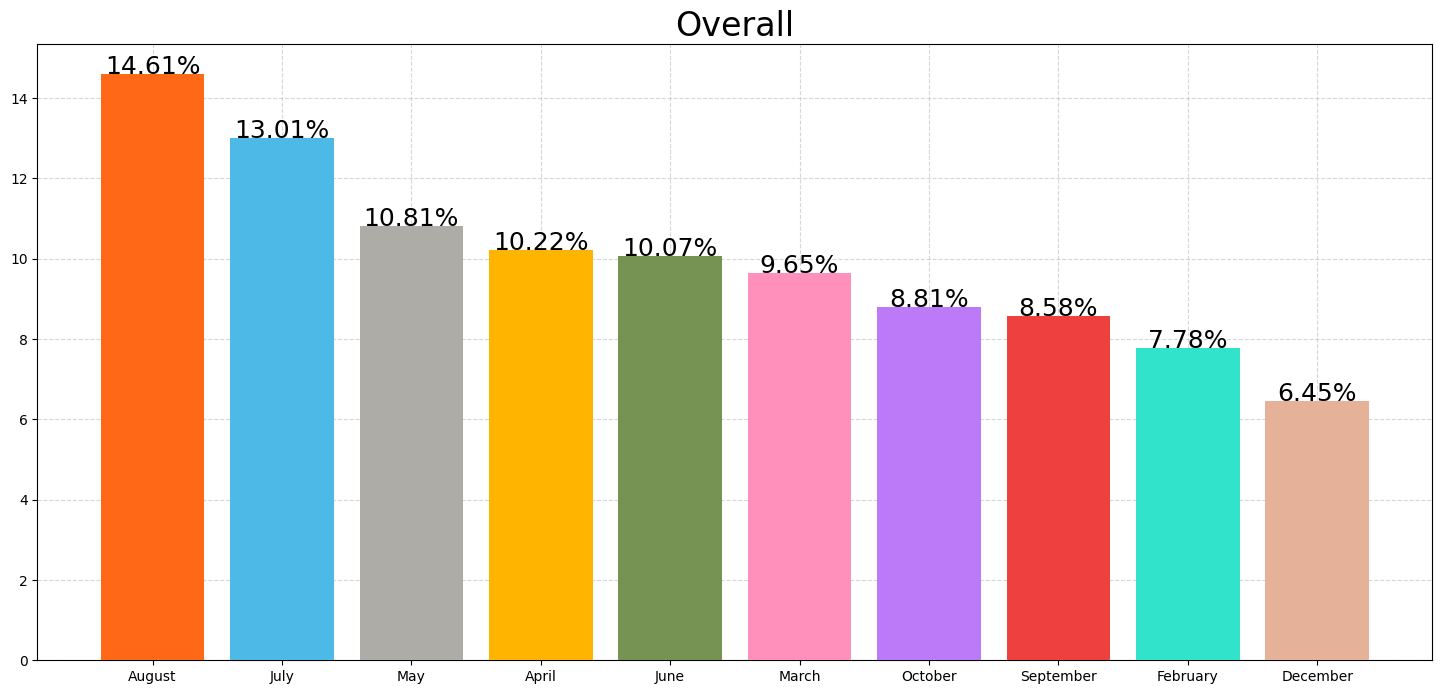

In [186]:
my_plot(column = 'arrival_date_month', subplot= 1, graph='countplot%')

## **Q8.** How many reservation were made by repeated guests?

### A. Hotel wise

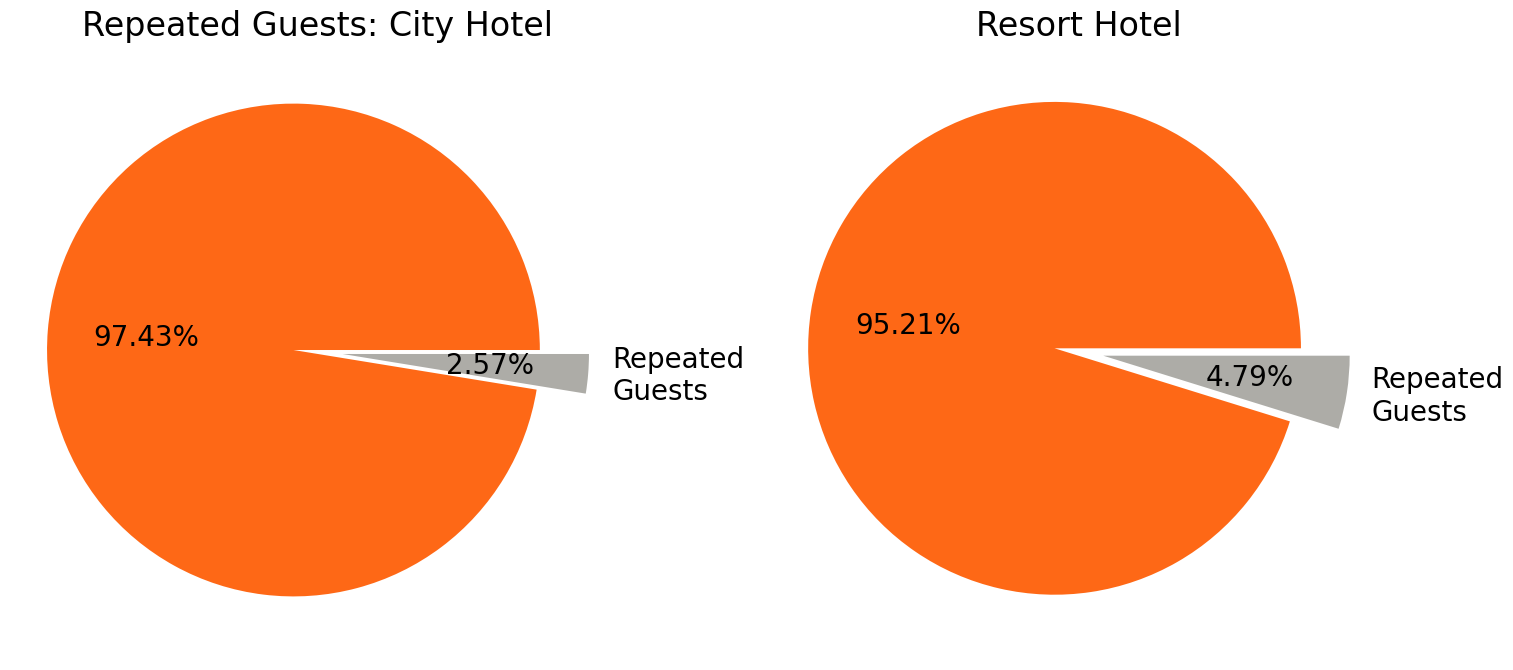

In [187]:
my_plot(hotel= city, column='is_repeated_guest', graph='pie', pie_labels=['', 'Repeated\nGuests'], title='Repeated Guests: City Hotel')
my_plot(hotel= resort, column='is_repeated_guest', graph='pie', pie_labels=['', 'Repeated\nGuests'], title='Resort Hotel', subplot= 2)

### B. Overall

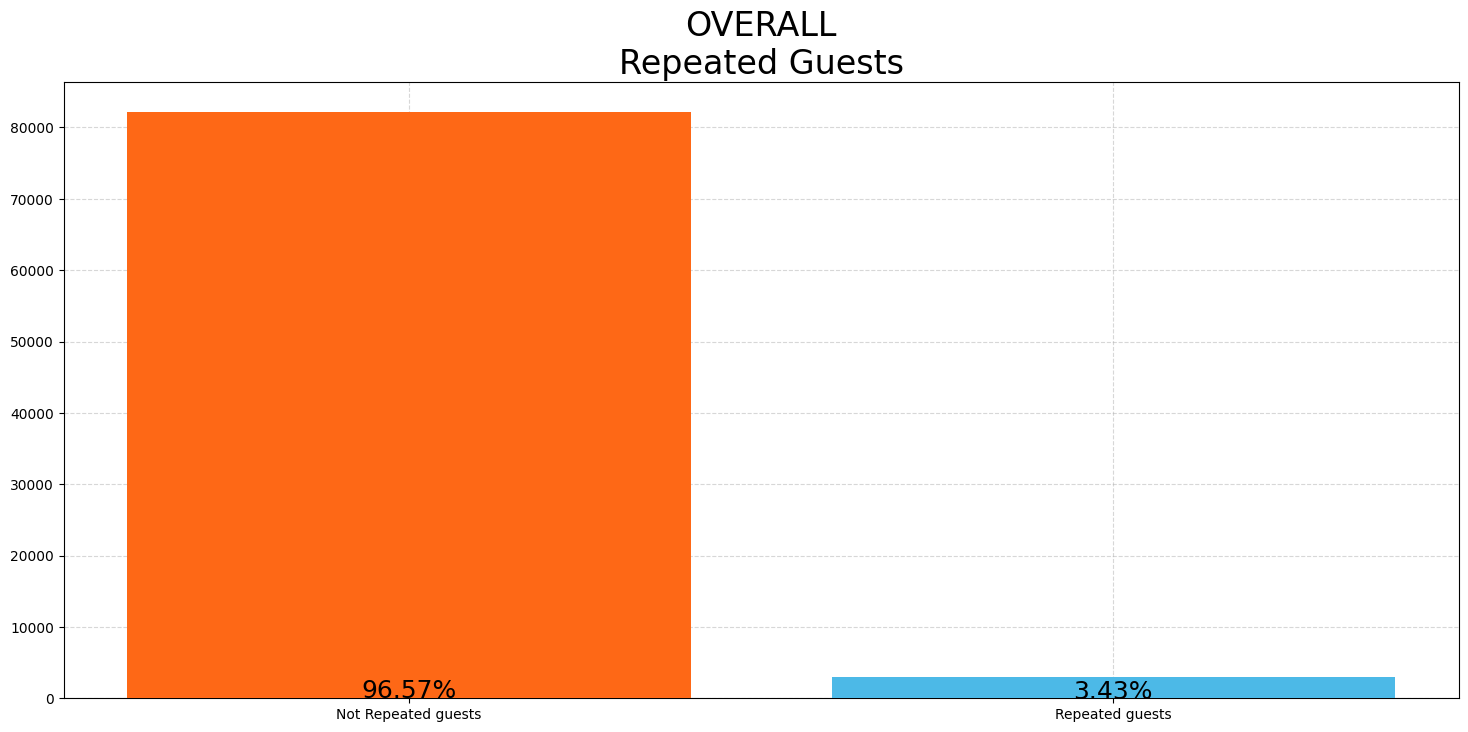

In [188]:
my_plot(column='is_repeated_guest', title='OVERALL\nRepeated Guests', bar_xticks=['Not Repeated guests', 'Repeated guests'])

## **Q9.** what is the preferred stay length by guests in each type of hotel ?

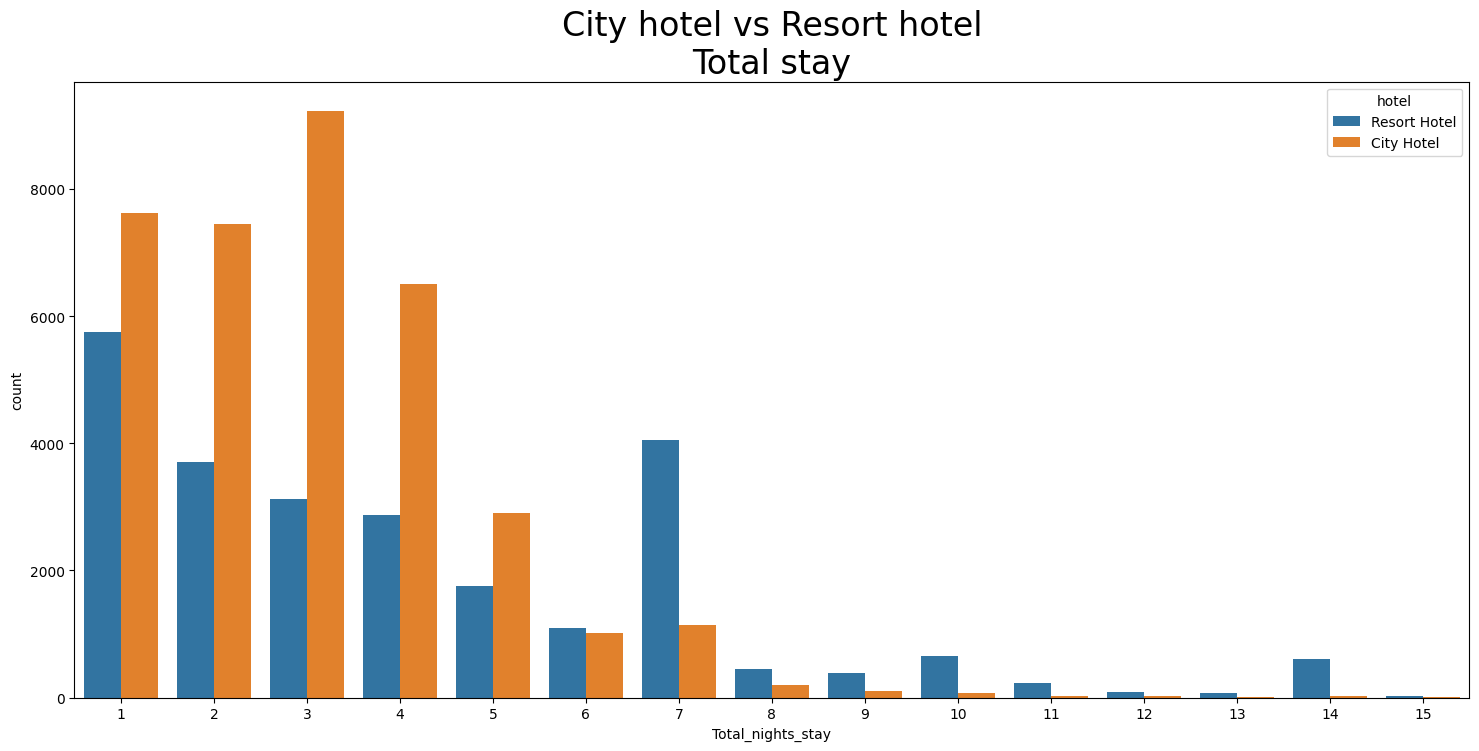

In [189]:
hotel_stay = confirmed_guests.loc[confirmed_guests['Total_nights_stay']<16]
sns.countplot(data=hotel_stay, x = 'Total_nights_stay', hue='hotel')
plt.title('City hotel vs Resort hotel\nTotal stay', fontsize = 24)
plt.show()

## **Q10.** How does the adr/price per night vary over the year?

In [190]:
sep = confirmed_guests.groupby(by='hotel')
city_adr_month_wise = sep.get_group('City Hotel').groupby(by = 'arrival_date_month')['adr_per_person'].mean()
resort_adr_month_wise = sep.get_group('Resort Hotel').groupby(by = 'arrival_date_month')['adr_per_person'].mean()

arranged_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
arranged_records = pd.merge(left= city_adr_month_wise, right= resort_adr_month_wise, on = 'arrival_date_month').loc[arranged_months]
arranged_records.columns = ['City Hotel', 'Resort Hotel']
arranged_records


City Hotel  Resort Hotel
arrival_date_month                          
January              51.585592     31.087044
February             50.709354     31.322531
March                53.007306     34.859057
April                60.411289     44.850973
May                  73.566368     43.551185
June                 68.060050     57.665128
July                 58.591914     71.629591
August               59.520373     84.478563
September            71.620694     51.762899
October              64.458686     36.327338
November             58.387897     30.895952
December             50.265108     37.006199

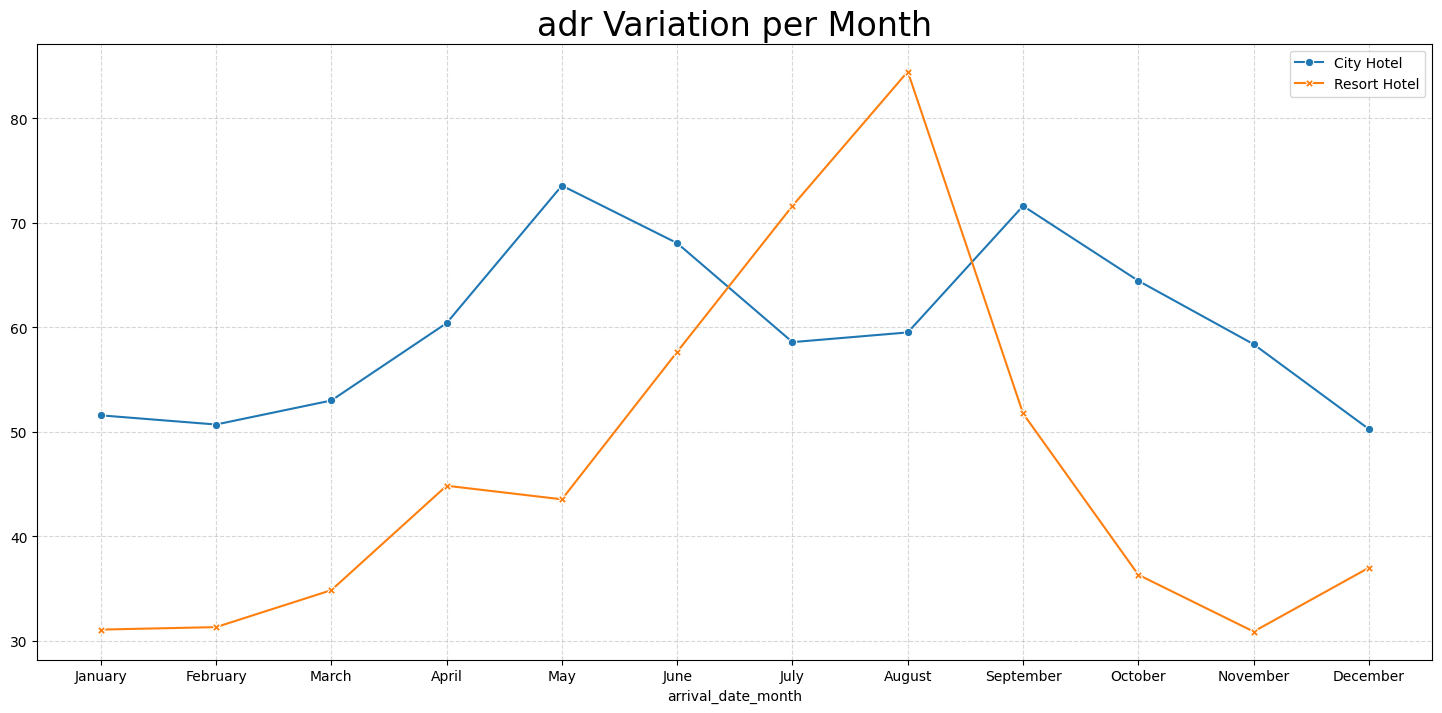

In [191]:
sns.lineplot(data=arranged_records, markers= True, dashes=False)
plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
plt.title('adr Variation per Month', fontsize = 24)
plt.show()

## **Q11.** How the the prices are distributed across the room type?

(0.0, 150.0)

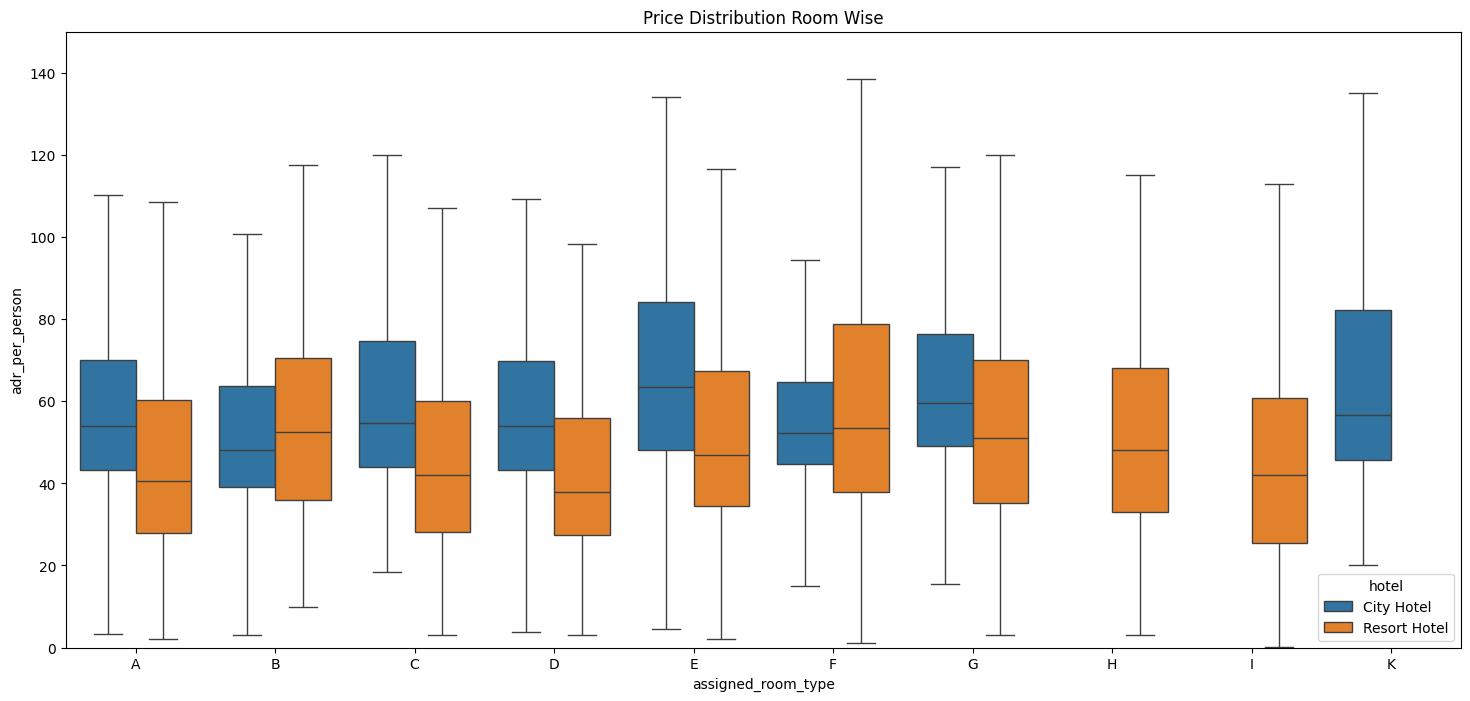

In [192]:
adr_room_type = confirmed_guests.loc[:,['hotel', 'assigned_room_type', 'adr_per_person']].sort_values(by='assigned_room_type')
sns.boxplot(x = 'assigned_room_type', y = 'adr_per_person', data=adr_room_type, hue='hotel', fliersize=0)
plt.title('Price Distribution Room Wise')
plt.ylim(0,150)


## **Q12.** Does a longer waiting period result in booking cancellations?

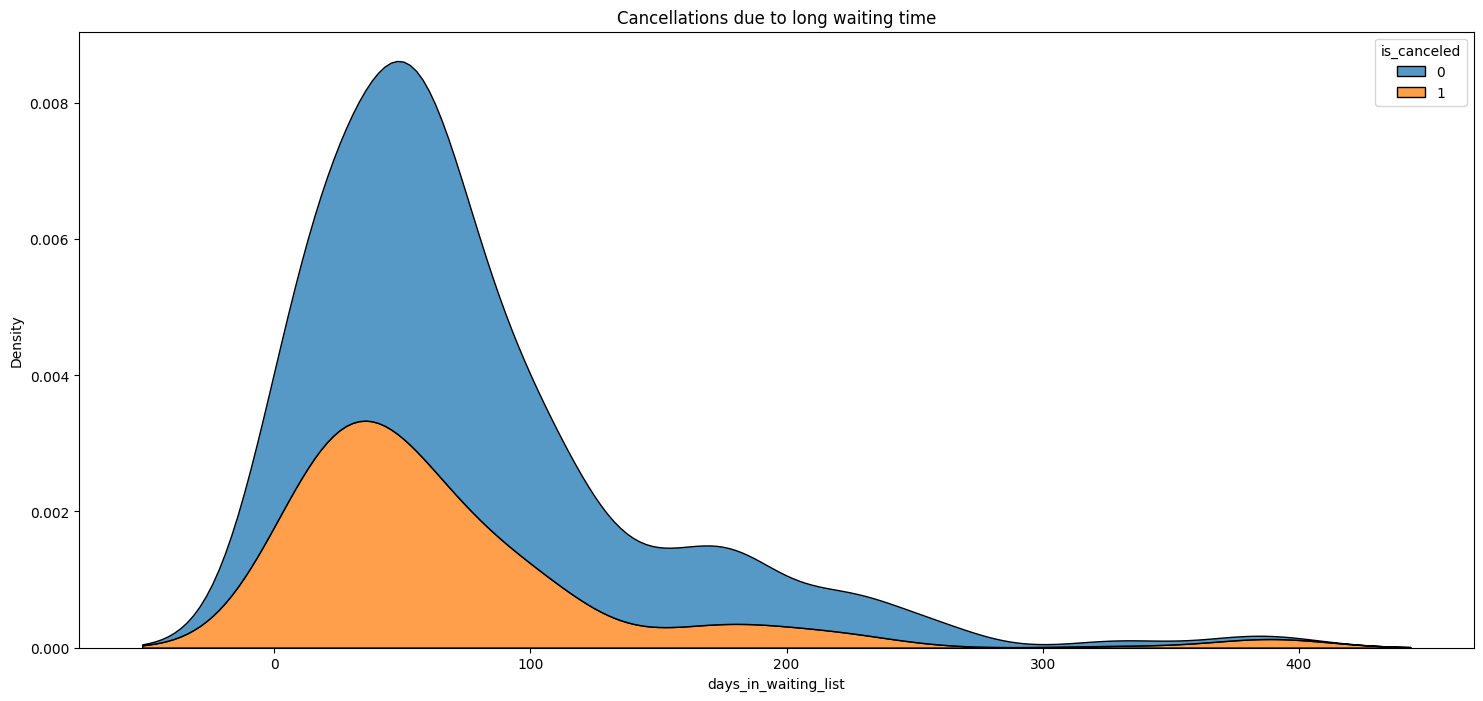

In [193]:
waiting_period_effect = dataset_df.loc[dataset_df['days_in_waiting_list']>0]
sns.kdeplot(x = 'days_in_waiting_list', data= waiting_period_effect, hue='is_canceled', multiple= 'stack')
plt.title("Cancellations due to long waiting time")
plt.show()

There may be more questions we may ask ourselves to assist us capture useful information. There is no single chart or question that can bring this ANALYSIS to a logically end.


<center>End of file</center>